# **Film Industry Insights: Patterns in Duration, Revenue and Genres**
BA780: Team A7
---

# **Introduction**
## **Project Objective and Motivation**

---
The objective of our project is to study the the trends in film industry, factors effecting the revenue and hence popularity of the movies in the dataset, study the relations between the genres and the keywords used to describe various movies belonging to different genres.

With the rise of available film content, it is crucial to investigate and assess patterns in the film industry revolving around runtime, revenues, movie genres, and factors correlated with them. These elements allow for the discovery of how films have been changing and what consumers have preferred for the last century. Because the amount of films on the market is rising and competition is rising with it, the film industry can benefit from such insights by identifying what factors have led to films' success.

Along with this, Team 7 is collectively passionate about the film industry and was excited to investigate patterns and make inferences from the dataset used.


## **Brief Description of Dataset**


---


The dataset that has been analyzed is sourced from TMDB and GroupLens. The main dataset, movies_metadata.csv, contains 45,466 rows and 20 columns, representing the movies and different factors respectively. In order to conduct proper analysis, the main dataset was merged with two smaller datasets, keywords.csv, containing 2 columns, and ratings_small.csv, containing 4 columns. Through the combination of these datasets, thorough evaluation of the film industry was able to take place. This led to answers on how the film industry has evolved over time.


The columns of movies_metadata.csv:
*   **adult:** Whether the movie is an "adult" movie (none of the films in the dataset are)
*   **belongs_to_collection:** Whether the movie belongs to a series or not
*   **budget:** Budget for filmmaking
*   **genres:** Genre classifications for movies
*   **homepage:** Link to movie's webpage
*   **id:** Movie id in the dataset
*   **imbd_id:** Movie id according to IMBD
*   **original_language:** Language the movie was filmed in
*   **original_title:** Original title of movie
*   **overview:** Summary of movie
*   **popularity:** Popularity with unknown maximum score, unit, and source
*   **poster_path:** File name of the movie poster
*   **production_countries:** What country the movie was produced in
*   **release_date:** Date of release of movie
*   **revenue:** Revenue made from movie
*   **runtime:** Duration of movie
*   **spoken_language:** Languages the movie is available in
*   **status:** (Released, Rumored)
*   **tagline:** Slogans for movie
*   **title:** Title of movie
*   **video:** Whether the movie is in video format or not
*   **vote_average:** Average rating of movie out of 10 based on votes
*   **vote_count:** How many votes movie received



The columns of keywords.csv:

*   **id:** Movie id in the dataset
*   **keywords:** list of keywords to describe movie


The columns of ratings_small.csv:

*   **userId:** Identification of user
*   **movieId:** Movie id in the dataset
*   **rating:** Rating of movie out of 5
*   **timestamp:** Timestamp of the exact time in seconds that the user rated the movie

Kaggle Link: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data

---

# **Report Summary**

Throughout this notebook, we investigated influential factors in the film industry. Before diving into analysis, we had to clean and merge two datasets to obtain clarity of what we wanted to explore. We saw that runtime had a sharp increase until the 1970s, and from there it began to decrease. We then explored how different attributes affect revenue. Our most important findings were that as budget and spoken languages increased, revenue also increased. Lastly, we identified the most common genres and then identified which keywords were most associated with those genres.

Before starting with our analysis, we need to import the necessary libraries and mount Google Drive.

In [1]:
# Import necessary libraries and mount Google Drive
# Use pandas to read the data from the csv files

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from wordcloud import WordCloud
import plotly.express as px
drive.mount('/content/gdrive')
data_key = pd.read_csv("/content/gdrive/MyDrive/keywords.csv")
data_mov = pd.read_csv("/content/gdrive/MyDrive/movies_metadata.csv")
data_rat = pd.read_csv("/content/gdrive/MyDrive/ratings_small.csv")

Mounted at /content/gdrive


<ipython-input-1-5d990d04e69d>:13: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_mov = pd.read_csv("/content/gdrive/MyDrive/movies_metadata.csv")


## **Data Cleaning**

---

### Filtering

Before taking on the dataset, we need to make sure it is clean and prepare it for further analysis. We started by only keeping the columns we will be using in the following parts of the project. Those columns are: Belongs to Collection, Budget, Genres, ID, Revenue, Original Language, Title, Original Title, Production Companies, Production Countries, Vote Count, Vote Average, Release Date, Runtime, Spoken Languages.

In [2]:
# Keep only the columns that are needed for analysis

data_mov_need = data_mov[['belongs_to_collection','budget', 'genres', 'id', 'revenue', 'original_language', 'title', 'original_title', 'production_companies', 'production_countries', 'vote_count', 'vote_average', 'release_date', 'runtime', 'spoken_languages',]]
data_mov_need

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,373554033.0,en,Toy Story,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",5415.0,7.7,1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]"
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,262797249.0,en,Jumanji,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2413.0,6.9,1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,0.0,en,Grumpier Old Men,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",92.0,6.5,1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]"
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",34.0,6.1,1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]"
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,76578911.0,en,Father of the Bride Part II,Father of the Bride Part II,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",173.0,5.7,1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,0.0,fa,Subdue,رگ خواب,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",1.0,4.0,NaN,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]"
45462,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,0.0,tl,Century of Birthing,Siglo ng Pagluluwal,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",3.0,9.0,2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]"
45463,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,0.0,en,Betrayal,Betrayal,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6.0,3.8,2003-08-01,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]"
45464,NaN,0,[],227506,0.0,en,Satan Triumphant,Satana likuyushchiy,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0,0.0,1917-10-21,87.0,[]


### Data Transformation & Merging

Now that we only have the data that we need, we convert  the 'id' column values into a string type. This will allow for 'id' from data_key to be merged with 'id' from data_mov_need.

In [3]:
# Convert the 'id' column in data_key from type 'integer' to type 'string'

data_key['id']=data_key['id'].astype(str)
print(data_key.dtypes)

id          object
keywords    object
dtype: object


Now that our data is ready for merging, we join the base movie dataset with the keywords dataset.

In [4]:
# Merge on the 'id' column because that is the common column between the two datasets
# Name the merged dataset 'data_mov_key'

data_mov_key = data_mov_need.merge(data_key, on='id', how='outer')
data_mov_key

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,373554033.0,en,Toy Story,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",5415.0,7.7,1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,262797249.0,en,Jumanji,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2413.0,6.9,1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,0.0,en,Grumpier Old Men,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",92.0,6.5,1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",34.0,6.1,1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,76578911.0,en,Father of the Bride Part II,Father of the Bride Part II,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",173.0,5.7,1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46481,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,0.0,fa,Subdue,رگ خواب,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",1.0,4.0,NaN,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]","[{'id': 10703, 'name': 'tragic love'}]"
46482,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,0.0,tl,Century of Birthing,Siglo ng Pagluluwal,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",3.0,9.0,2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]","[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46483,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,0.0,en,Betrayal,Betrayal,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6.0,3.8,2003-08-01,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",[]
46484,NaN,0,[],227506,0.0,en,Satan Triumphant,Satana likuyushchiy,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0,0.0,1917-10-21,87.0,[],[]


### Cleaning Columns for Clarity

The 'genres', 'production_companies', 'keywords', 'production_countries', 'belongs_to_collection', 'spoken_languages' columns had extra characters, numerical values, and words that were not needed for this project's objective. The steps listed in the following code were conducted on these columns so that analysis was easier to fulfill.

In [5]:
# Clean the 'genres' column so that it is easier to analyze
# Remove extra characters and replace with a space
# Remove "id" and "name" from 'genres' column
# Remove numerical values from the 'genres' column and replace with a space

data_mov_key['genres'] = data_mov_key['genres'].str.replace('[', '')
data_mov_key['genres'] = data_mov_key['genres'].str.replace(']', '')
data_mov_key['genres'] = data_mov_key['genres'].str.replace("'", '')
data_mov_key['genres'] = data_mov_key['genres'].str.replace(':', '')
data_mov_key['genres'] = data_mov_key['genres'].str.replace('{', '')
data_mov_key['genres'] = data_mov_key['genres'].str.replace('}', '')
data_mov_key['genres'] = data_mov_key['genres'].str.replace('id', '')
data_mov_key['genres'] = data_mov_key['genres'].str.replace('name', '')
data_mov_key['genres'] = data_mov_key['genres'].str.replace(r'\d+, ?', '')
data_mov_key

<ipython-input-5-2bb73315bcd1>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['genres'] = data_mov_key['genres'].str.replace('[', '')
<ipython-input-5-2bb73315bcd1>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['genres'] = data_mov_key['genres'].str.replace(']', '')
<ipython-input-5-2bb73315bcd1>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['genres'] = data_mov_key['genres'].str.replace('{', '')
<ipython-input-5-2bb73315bcd1>:11: FutureWarning: The default value of regex w

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"Animation, Comedy, Family",862,373554033.0,en,Toy Story,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",5415.0,7.7,1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,NaN,65000000,"Adventure, Fantasy, Family",8844,262797249.0,en,Jumanji,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2413.0,6.9,1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"Romance, Comedy",15602,0.0,en,Grumpier Old Men,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",92.0,6.5,1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,NaN,16000000,"Comedy, Drama, Romance",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",34.0,6.1,1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,11862,76578911.0,en,Father of the Bride Part II,Father of the Bride Part II,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",173.0,5.7,1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46481,NaN,0,"Drama, Family",439050,0.0,fa,Subdue,رگ خواب,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",1.0,4.0,NaN,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]","[{'id': 10703, 'name': 'tragic love'}]"
46482,NaN,0,Drama,111109,0.0,tl,Century of Birthing,Siglo ng Pagluluwal,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",3.0,9.0,2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]","[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46483,NaN,0,"Action, Drama, Thriller",67758,0.0,en,Betrayal,Betrayal,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6.0,3.8,2003-08-01,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",[]
46484,NaN,0,,227506,0.0,en,Satan Triumphant,Satana likuyushchiy,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0,0.0,1917-10-21,87.0,[],[]


In [6]:
# Repeat the steps above on the 'production_companies' column

data_mov_key['production_companies'] = data_mov_key['production_companies'].str.replace('[', '')
data_mov_key['production_companies'] = data_mov_key['production_companies'].str.replace(']', '')
data_mov_key['production_companies'] = data_mov_key['production_companies'].str.replace("'", '')
data_mov_key['production_companies'] = data_mov_key['production_companies'].str.replace(':', '')
data_mov_key['production_companies'] = data_mov_key['production_companies'].str.replace('{', '')
data_mov_key['production_companies'] = data_mov_key['production_companies'].str.replace('}', '')
data_mov_key['production_companies'] = data_mov_key['production_companies'].str.replace('id', '')
data_mov_key['production_companies'] = data_mov_key['production_companies'].str.replace('name', '')
data_mov_key['production_companies'] = data_mov_key['production_companies'].str.replace(r'\d+, ?', '')
data_mov_key['production_companies'] = data_mov_key['production_companies'].str.replace(r'[\d,]+', '', regex=True)
data_mov_key

<ipython-input-6-776860fae16d>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['production_companies'] = data_mov_key['production_companies'].str.replace('[', '')
<ipython-input-6-776860fae16d>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['production_companies'] = data_mov_key['production_companies'].str.replace(']', '')
<ipython-input-6-776860fae16d>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['production_companies'] = data_mov_key['production_companies'].str.replace('{',

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"Animation, Comedy, Family",862,373554033.0,en,Toy Story,Toy Story,Pixar Animation Studios,"[{'iso_3166_1': 'US', 'name': 'United States o...",5415.0,7.7,1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,NaN,65000000,"Adventure, Fantasy, Family",8844,262797249.0,en,Jumanji,Jumanji,TriStar Pictures Teitler Film Interscope ...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2413.0,6.9,1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"Romance, Comedy",15602,0.0,en,Grumpier Old Men,Grumpier Old Men,Warner Bros. Lancaster Gate,"[{'iso_3166_1': 'US', 'name': 'United States o...",92.0,6.5,1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,NaN,16000000,"Comedy, Drama, Romance",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,Twentieth Century Fox Film Corporation,"[{'iso_3166_1': 'US', 'name': 'United States o...",34.0,6.1,1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,11862,76578911.0,en,Father of the Bride Part II,Father of the Bride Part II,Sandollar Productions Touchstone Pictures,"[{'iso_3166_1': 'US', 'name': 'United States o...",173.0,5.7,1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46481,NaN,0,"Drama, Family",439050,0.0,fa,Subdue,رگ خواب,,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",1.0,4.0,NaN,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]","[{'id': 10703, 'name': 'tragic love'}]"
46482,NaN,0,Drama,111109,0.0,tl,Century of Birthing,Siglo ng Pagluluwal,Sine Olivia,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",3.0,9.0,2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]","[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46483,NaN,0,"Action, Drama, Thriller",67758,0.0,en,Betrayal,Betrayal,American World Pictures,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.0,3.8,2003-08-01,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",[]
46484,NaN,0,,227506,0.0,en,Satan Triumphant,Satana likuyushchiy,Yermoliev,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0,0.0,1917-10-21,87.0,[],[]


In [7]:
# Repeat the steps above on the 'keywords' column

data_mov_key['keywords'] = data_mov_key['keywords'].str.replace('[', '')
data_mov_key['keywords'] = data_mov_key['keywords'].str.replace(']', '')
data_mov_key['keywords'] = data_mov_key['keywords'].str.replace("'", '')
data_mov_key['keywords'] = data_mov_key['keywords'].str.replace(':', '')
data_mov_key['keywords'] = data_mov_key['keywords'].str.replace('{', '')
data_mov_key['keywords'] = data_mov_key['keywords'].str.replace('}', '')
data_mov_key['keywords'] = data_mov_key['keywords'].str.replace('id', '')
data_mov_key['keywords'] = data_mov_key['keywords'].str.replace('name', '')
data_mov_key['keywords'] = data_mov_key['keywords'].str.replace(r'\d+, ?', '')
data_mov_key

<ipython-input-7-f3919bd39fd3>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['keywords'] = data_mov_key['keywords'].str.replace('[', '')
<ipython-input-7-f3919bd39fd3>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['keywords'] = data_mov_key['keywords'].str.replace(']', '')
<ipython-input-7-f3919bd39fd3>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['keywords'] = data_mov_key['keywords'].str.replace('{', '')
<ipython-input-7-f3919bd39fd3>:8: FutureWarning: The default value 

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"Animation, Comedy, Family",862,373554033.0,en,Toy Story,Toy Story,Pixar Animation Studios,"[{'iso_3166_1': 'US', 'name': 'United States o...",5415.0,7.7,1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]","jealousy, toy, boy, friendship, frie..."
1,NaN,65000000,"Adventure, Fantasy, Family",8844,262797249.0,en,Jumanji,Jumanji,TriStar Pictures Teitler Film Interscope ...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2413.0,6.9,1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","board game, disappearance, ""based on chi..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"Romance, Comedy",15602,0.0,en,Grumpier Old Men,Grumpier Old Men,Warner Bros. Lancaster Gate,"[{'iso_3166_1': 'US', 'name': 'United States o...",92.0,6.5,1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]","fishing, best friend, duringcreditssting..."
3,NaN,16000000,"Comedy, Drama, Romance",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,Twentieth Century Fox Film Corporation,"[{'iso_3166_1': 'US', 'name': 'United States o...",34.0,6.1,1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]","based on novel, interracial relationship, ..."
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,11862,76578911.0,en,Father of the Bride Part II,Father of the Bride Part II,Sandollar Productions Touchstone Pictures,"[{'iso_3166_1': 'US', 'name': 'United States o...",173.0,5.7,1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]","baby, mlife crisis, confence, aging, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46481,NaN,0,"Drama, Family",439050,0.0,fa,Subdue,رگ خواب,,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",1.0,4.0,NaN,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",tragic love
46482,NaN,0,Drama,111109,0.0,tl,Century of Birthing,Siglo ng Pagluluwal,Sine Olivia,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",3.0,9.0,2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]","artist, play, pinoy"
46483,NaN,0,"Action, Drama, Thriller",67758,0.0,en,Betrayal,Betrayal,American World Pictures,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.0,3.8,2003-08-01,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",
46484,NaN,0,,227506,0.0,en,Satan Triumphant,Satana likuyushchiy,Yermoliev,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0,0.0,1917-10-21,87.0,[],


In [8]:
# Repeat the steps above on the 'production_countries' column

data_mov_key['production_countries'] = data_mov_key['production_countries'].str.replace('[', '')
data_mov_key['production_countries'] = data_mov_key['production_countries'].str.replace(']', '')
data_mov_key['production_countries'] = data_mov_key['production_countries'].str.replace("'", '')
data_mov_key['production_countries'] = data_mov_key['production_countries'].str.replace(':', '')
data_mov_key['production_countries'] = data_mov_key['production_countries'].str.replace('{', '')
data_mov_key['production_countries'] = data_mov_key['production_countries'].str.replace('}', '')
data_mov_key['production_countries'] = data_mov_key['production_countries'].str.replace('id', '')
data_mov_key['production_countries'] = data_mov_key['production_countries'].str.replace('name', '')
data_mov_key['production_countries'] = data_mov_key['production_countries'].str.replace('iso_3166_1', '')
data_mov_key['production_countries'] = data_mov_key['production_countries'].str.replace(r'\d+, ?', '')


data_mov_key

<ipython-input-8-0997640d8c2d>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['production_countries'] = data_mov_key['production_countries'].str.replace('[', '')
<ipython-input-8-0997640d8c2d>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['production_countries'] = data_mov_key['production_countries'].str.replace(']', '')
<ipython-input-8-0997640d8c2d>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['production_countries'] = data_mov_key['production_countries'].str.replace('{',

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"Animation, Comedy, Family",862,373554033.0,en,Toy Story,Toy Story,Pixar Animation Studios,"US, United States of America",5415.0,7.7,1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]","jealousy, toy, boy, friendship, frie..."
1,NaN,65000000,"Adventure, Fantasy, Family",8844,262797249.0,en,Jumanji,Jumanji,TriStar Pictures Teitler Film Interscope ...,"US, United States of America",2413.0,6.9,1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","board game, disappearance, ""based on chi..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"Romance, Comedy",15602,0.0,en,Grumpier Old Men,Grumpier Old Men,Warner Bros. Lancaster Gate,"US, United States of America",92.0,6.5,1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]","fishing, best friend, duringcreditssting..."
3,NaN,16000000,"Comedy, Drama, Romance",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,Twentieth Century Fox Film Corporation,"US, United States of America",34.0,6.1,1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]","based on novel, interracial relationship, ..."
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,11862,76578911.0,en,Father of the Bride Part II,Father of the Bride Part II,Sandollar Productions Touchstone Pictures,"US, United States of America",173.0,5.7,1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]","baby, mlife crisis, confence, aging, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46481,NaN,0,"Drama, Family",439050,0.0,fa,Subdue,رگ خواب,,"IR, Iran",1.0,4.0,NaN,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",tragic love
46482,NaN,0,Drama,111109,0.0,tl,Century of Birthing,Siglo ng Pagluluwal,Sine Olivia,"PH, Philippines",3.0,9.0,2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]","artist, play, pinoy"
46483,NaN,0,"Action, Drama, Thriller",67758,0.0,en,Betrayal,Betrayal,American World Pictures,"US, United States of America",6.0,3.8,2003-08-01,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",
46484,NaN,0,,227506,0.0,en,Satan Triumphant,Satana likuyushchiy,Yermoliev,"RU, Russia",0.0,0.0,1917-10-21,87.0,[],


In [9]:
# Repeat the steps above on the 'spoken languages' column
data_mov_key['spoken_languages'] = data_mov_key['spoken_languages'].str.replace('[','')
data_mov_key['spoken_languages'] = data_mov_key['spoken_languages'].str.replace(']','')
data_mov_key['spoken_languages'] = data_mov_key['spoken_languages'].str.replace('{','')
data_mov_key['spoken_languages'] = data_mov_key['spoken_languages'].str.replace('}','')
data_mov_key['spoken_languages'] = data_mov_key['spoken_languages'].str.replace('name','')
data_mov_key['spoken_languages'] = data_mov_key['spoken_languages'].str.replace('iso_639_1','')
data_mov_key['spoken_languages'] = data_mov_key['spoken_languages'].str.replace(':','')
data_mov_key['spoken_languages'] = data_mov_key['spoken_languages'].str.replace(',','')
data_mov_key['spoken_languages'] = data_mov_key['spoken_languages'].str.replace("'",'')
data_mov_key['spoken_languages'] = data_mov_key['spoken_languages'].str.replace('tl','')
data_mov_key['spoken_languages'] = data_mov_key['spoken_languages'].str.strip()
data_mov_key = data_mov_key[data_mov_key['spoken_languages'] != '']
data_mov_key

<ipython-input-9-8ac66d037a1b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['spoken_languages'] = data_mov_key['spoken_languages'].str.replace('[','')
<ipython-input-9-8ac66d037a1b>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['spoken_languages'] = data_mov_key['spoken_languages'].str.replace(']','')
<ipython-input-9-8ac66d037a1b>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_mov_key['spoken_languages'] = data_mov_key['spoken_languages'].str.replace('{','')
<ipython-input-9-8ac66

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"Animation, Comedy, Family",862,373554033.0,en,Toy Story,Toy Story,Pixar Animation Studios,"US, United States of America",5415.0,7.7,1995-10-30,81.0,en English,"jealousy, toy, boy, friendship, frie..."
1,NaN,65000000,"Adventure, Fantasy, Family",8844,262797249.0,en,Jumanji,Jumanji,TriStar Pictures Teitler Film Interscope ...,"US, United States of America",2413.0,6.9,1995-12-15,104.0,en English fr Français,"board game, disappearance, ""based on chi..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"Romance, Comedy",15602,0.0,en,Grumpier Old Men,Grumpier Old Men,Warner Bros. Lancaster Gate,"US, United States of America",92.0,6.5,1995-12-22,101.0,en English,"fishing, best friend, duringcreditssting..."
3,NaN,16000000,"Comedy, Drama, Romance",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,Twentieth Century Fox Film Corporation,"US, United States of America",34.0,6.1,1995-12-22,127.0,en English,"based on novel, interracial relationship, ..."
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,11862,76578911.0,en,Father of the Bride Part II,Father of the Bride Part II,Sandollar Productions Touchstone Pictures,"US, United States of America",173.0,5.7,1995-02-10,106.0,en English,"baby, mlife crisis, confence, aging, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46479,NaN,0,Science Fiction,222848,0.0,en,Caged Heat 3000,Caged Heat 3000,Concorde-New Horizons,"US, United States of America",1.0,3.5,1995-01-01,85.0,en English,
46480,NaN,0,"Drama, Action, Romance",30840,0.0,en,Robin Hood,Robin Hood,Westdeutscher Rundfunk (WDR) Working Title ...,"CA, Canada, DE, Germany, GB, United King...",26.0,5.7,1991-05-13,104.0,en English,
46481,NaN,0,"Drama, Family",439050,0.0,fa,Subdue,رگ خواب,,"IR, Iran",1.0,4.0,NaN,90.0,fa فارسی,tragic love
46483,NaN,0,"Action, Drama, Thriller",67758,0.0,en,Betrayal,Betrayal,American World Pictures,"US, United States of America",6.0,3.8,2003-08-01,90.0,en English,


In [10]:
# Repeat the steps above on the 'belongs to collection' column
data_mov_key['belongs_to_collection'] = data_mov_key['belongs_to_collection'].astype('str')
data_mov_key['belongs_to_collection'] = data_mov_key['belongs_to_collection'].str.replace('\'id\'', '')
data_mov_key['belongs_to_collection'] = data_mov_key['belongs_to_collection'].str.replace('{', '')
data_mov_key['belongs_to_collection'] = data_mov_key['belongs_to_collection'].str.replace("'", '')
data_mov_key['belongs_to_collection'] = data_mov_key['belongs_to_collection'].str.replace(':', '')
data_mov_key['belongs_to_collection'] = data_mov_key['belongs_to_collection'].str.replace('}', '')
data_mov_key['belongs_to_collection'] = data_mov_key['belongs_to_collection'].str.replace('name', '')
data_mov_key['belongs_to_collection'] = data_mov_key['belongs_to_collection'].str.replace(r'\d+, ?', '')
data_mov_key['belongs_to_collection'] = data_mov_key['belongs_to_collection'].str.replace(',', '')
data_mov_key['belongs_to_collection'] = data_mov_key['belongs_to_collection'].apply(lambda x: x[:x.find('Collection')+len('Collection')])
data_mov_key

<ipython-input-10-c4f6326e2f4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mov_key['belongs_to_collection'] = data_mov_key['belongs_to_collection'].astype('str')
<ipython-input-10-c4f6326e2f4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mov_key['belongs_to_collection'] = data_mov_key['belongs_to_collection'].str.replace('\'id\'', '')
<ipython-input-10-c4f6326e2f4b>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single chara

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords
0,Toy Story Collection,30000000,"Animation, Comedy, Family",862,373554033.0,en,Toy Story,Toy Story,Pixar Animation Studios,"US, United States of America",5415.0,7.7,1995-10-30,81.0,en English,"jealousy, toy, boy, friendship, frie..."
1,nan,65000000,"Adventure, Fantasy, Family",8844,262797249.0,en,Jumanji,Jumanji,TriStar Pictures Teitler Film Interscope ...,"US, United States of America",2413.0,6.9,1995-12-15,104.0,en English fr Français,"board game, disappearance, ""based on chi..."
2,Grumpy Old Men Collection,0,"Romance, Comedy",15602,0.0,en,Grumpier Old Men,Grumpier Old Men,Warner Bros. Lancaster Gate,"US, United States of America",92.0,6.5,1995-12-22,101.0,en English,"fishing, best friend, duringcreditssting..."
3,nan,16000000,"Comedy, Drama, Romance",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,Twentieth Century Fox Film Corporation,"US, United States of America",34.0,6.1,1995-12-22,127.0,en English,"based on novel, interracial relationship, ..."
4,Father of the Bride Collection,0,Comedy,11862,76578911.0,en,Father of the Bride Part II,Father of the Bride Part II,Sandollar Productions Touchstone Pictures,"US, United States of America",173.0,5.7,1995-02-10,106.0,en English,"baby, mlife crisis, confence, aging, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46479,nan,0,Science Fiction,222848,0.0,en,Caged Heat 3000,Caged Heat 3000,Concorde-New Horizons,"US, United States of America",1.0,3.5,1995-01-01,85.0,en English,
46480,nan,0,"Drama, Action, Romance",30840,0.0,en,Robin Hood,Robin Hood,Westdeutscher Rundfunk (WDR) Working Title ...,"CA, Canada, DE, Germany, GB, United King...",26.0,5.7,1991-05-13,104.0,en English,
46481,nan,0,"Drama, Family",439050,0.0,fa,Subdue,رگ خواب,,"IR, Iran",1.0,4.0,NaN,90.0,fa فارسی,tragic love
46483,nan,0,"Action, Drama, Thriller",67758,0.0,en,Betrayal,Betrayal,American World Pictures,"US, United States of America",6.0,3.8,2003-08-01,90.0,en English,


### Dropping Duplicate Values

Checking and removing duplicate values is crucial because duplicate values may skew our final results. Let's check whether we have any duplicates.


In [11]:
# Check for existing duplicates in the 'data_mov_key' dataset

duplicates = data_mov_key[data_mov_key['id'].duplicated()]
duplicates

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords
677,nan,0,"Drama, Romance",105045,0.0,de,The Promise,Das Versprechen,Studio Babelsberg Centre National de la Cin...,"DE, Germany",1.0,5.0,1995-02-16,115.0,de Deutsch,"anti-communism, political, woman director"
678,nan,0,"Drama, Romance",105045,0.0,de,The Promise,Das Versprechen,Studio Babelsberg Centre National de la Cin...,"DE, Germany",1.0,5.0,1995-02-16,115.0,de Deutsch,"anti-communism, political, woman director"
679,nan,0,"Drama, Romance",105045,0.0,de,The Promise,Das Versprechen,Studio Babelsberg Centre National de la Cin...,"DE, Germany",1.0,5.0,1995-02-16,115.0,de Deutsch,"anti-communism, political, woman director"
842,nan,0,Drama,132641,0.0,ja,Wife,Tsuma,Toho Company,"JP, Japan",0.0,0.0,1953-04-29,89.0,ja 日本語,"based on novel, wife, marriage, unhapp..."
843,nan,0,Drama,132641,0.0,ja,Wife,Tsuma,Toho Company,"JP, Japan",0.0,0.0,1953-04-29,89.0,ja 日本語,"based on novel, wife, marriage, unhapp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37360,nan,0,"Thriller, Documentary",367215,0.0,en,The Fear of 13,The Fear of 13,,,45.0,8.0,2015-10-15,96.0,en English,"prison, prisoner, death row, reenactme..."
37362,nan,37000000,"Action, Adventure, Fantasy",299824,278300000.0,zh,Mojin: The Lost Legend,寻龙诀,Beijing Enlight Pictures,"CN, China",71.0,6.0,2015-12-18,127.0,zh 普通话 th ภาษาไทย,"love triangle, past, zombie, tomb, g..."
37366,nan,0,Comedy,44637,0.0,en,Trevor Noah: The Daywalker,Trevor Noah: The Daywalker,,"ZA, South Africa",4.0,7.4,2009-11-05,71.0,en English,
37368,nan,0,"TV Movie, Drama",86186,0.0,en,Perfect Body,Perfect Body,NBC Studios,,4.0,4.3,1997-09-08,100.0,en English,sport


As we can see, we do have some duplicates. Let's get rid of them.

In [12]:
# Remove duplicates

data_mov_key = data_mov_key.drop_duplicates(subset=['id'])
data_mov_key

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords
0,Toy Story Collection,30000000,"Animation, Comedy, Family",862,373554033.0,en,Toy Story,Toy Story,Pixar Animation Studios,"US, United States of America",5415.0,7.7,1995-10-30,81.0,en English,"jealousy, toy, boy, friendship, frie..."
1,nan,65000000,"Adventure, Fantasy, Family",8844,262797249.0,en,Jumanji,Jumanji,TriStar Pictures Teitler Film Interscope ...,"US, United States of America",2413.0,6.9,1995-12-15,104.0,en English fr Français,"board game, disappearance, ""based on chi..."
2,Grumpy Old Men Collection,0,"Romance, Comedy",15602,0.0,en,Grumpier Old Men,Grumpier Old Men,Warner Bros. Lancaster Gate,"US, United States of America",92.0,6.5,1995-12-22,101.0,en English,"fishing, best friend, duringcreditssting..."
3,nan,16000000,"Comedy, Drama, Romance",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,Twentieth Century Fox Film Corporation,"US, United States of America",34.0,6.1,1995-12-22,127.0,en English,"based on novel, interracial relationship, ..."
4,Father of the Bride Collection,0,Comedy,11862,76578911.0,en,Father of the Bride Part II,Father of the Bride Part II,Sandollar Productions Touchstone Pictures,"US, United States of America",173.0,5.7,1995-02-10,106.0,en English,"baby, mlife crisis, confence, aging, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46479,nan,0,Science Fiction,222848,0.0,en,Caged Heat 3000,Caged Heat 3000,Concorde-New Horizons,"US, United States of America",1.0,3.5,1995-01-01,85.0,en English,
46480,nan,0,"Drama, Action, Romance",30840,0.0,en,Robin Hood,Robin Hood,Westdeutscher Rundfunk (WDR) Working Title ...,"CA, Canada, DE, Germany, GB, United King...",26.0,5.7,1991-05-13,104.0,en English,
46481,nan,0,"Drama, Family",439050,0.0,fa,Subdue,رگ خواب,,"IR, Iran",1.0,4.0,NaN,90.0,fa فارسی,tragic love
46483,nan,0,"Action, Drama, Thriller",67758,0.0,en,Betrayal,Betrayal,American World Pictures,"US, United States of America",6.0,3.8,2003-08-01,90.0,en English,


### Null Values

Similarly to duplicate values, null values may also affect the results. In order to explore the dataset, null values were identified. Then, null values were counted for each column so that a decision can be made on what to do with them when it was time to dive into the questions that need to be answered for the problem.

In [13]:
# Check for null value

null_values=data_mov_key.isnull()
null_values

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46479,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
46480,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
46481,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
46483,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# Get the sum of null values in each column

null_counts = null_values.sum()
null_counts

belongs_to_collection      0
budget                     0
genres                     0
id                         0
revenue                    6
original_language         11
title                      6
original_title             0
production_companies       3
production_countries       3
vote_count                 6
vote_average               6
release_date              26
runtime                  151
spoken_languages           6
keywords                   3
dtype: int64

We decided to drop the null values for the columns below, as they do not contribute to the further analysis. Dropping them will not substantially impact the project.

In [15]:
# Drop null values in the listed columns to adjust the dataset

data_mov_key.dropna(subset=['spoken_languages', 'runtime', 'release_date', 'original_language', 'title', 'production_companies', 'production_countries', 'vote_count','vote_average','keywords','revenue'], inplace=True)
data_mov_key

<ipython-input-15-544e789ca963>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mov_key.dropna(subset=['spoken_languages', 'runtime', 'release_date', 'original_language', 'title', 'production_companies', 'production_countries', 'vote_count','vote_average','keywords','revenue'], inplace=True)


,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords
0,Toy Story Collection,30000000,"Animation, Comedy, Family",862,373554033.0,en,Toy Story,Toy Story,Pixar Animation Studios,"US, United States of America",5415.0,7.7,1995-10-30,81.0,en English,"jealousy, toy, boy, friendship, frie..."
1,nan,65000000,"Adventure, Fantasy, Family",8844,262797249.0,en,Jumanji,Jumanji,TriStar Pictures Teitler Film Interscope ...,"US, United States of America",2413.0,6.9,1995-12-15,104.0,en English fr Français,"board game, disappearance, ""based on chi..."
2,Grumpy Old Men Collection,0,"Romance, Comedy",15602,0.0,en,Grumpier Old Men,Grumpier Old Men,Warner Bros. Lancaster Gate,"US, United States of America",92.0,6.5,1995-12-22,101.0,en English,"fishing, best friend, duringcreditssting..."
3,nan,16000000,"Comedy, Drama, Romance",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,Twentieth Century Fox Film Corporation,"US, United States of America",34.0,6.1,1995-12-22,127.0,en English,"based on novel, interracial relationship, ..."
4,Father of the Bride Collection,0,Comedy,11862,76578911.0,en,Father of the Bride Part II,Father of the Bride Part II,Sandollar Productions Touchstone Pictures,"US, United States of America",173.0,5.7,1995-02-10,106.0,en English,"baby, mlife crisis, confence, aging, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46478,nan,0,Horror,289923,0.0,en,The Burkittsville 7,The Burkittsville 7,Neptune Salad Entertainment Pirie Productio...,"US, United States of America",1.0,7.0,2000-10-03,30.0,en English,"witch, mythology, legend, serial kille..."
46479,nan,0,Science Fiction,222848,0.0,en,Caged Heat 3000,Caged Heat 3000,Concorde-New Horizons,"US, United States of America",1.0,3.5,1995-01-01,85.0,en English,
46480,nan,0,"Drama, Action, Romance",30840,0.0,en,Robin Hood,Robin Hood,Westdeutscher Rundfunk (WDR) Working Title ...,"CA, Canada, DE, Germany, GB, United King...",26.0,5.7,1991-05-13,104.0,en English,
46483,nan,0,"Action, Drama, Thriller",67758,0.0,en,Betrayal,Betrayal,American World Pictures,"US, United States of America",6.0,3.8,2003-08-01,90.0,en English,


Let's check for the null values again to make sure that we did not miss anything.

In [16]:
data_mov_key.isnull().mean() * 100

belongs_to_collection    0.0
budget                   0.0
genres                   0.0
id                       0.0
revenue                  0.0
original_language        0.0
title                    0.0
original_title           0.0
production_companies     0.0
production_countries     0.0
vote_count               0.0
vote_average             0.0
release_date             0.0
runtime                  0.0
spoken_languages         0.0
keywords                 0.0
dtype: float64

*The merged dataset has now been cleaned and is ready for analysis!*

# **Overview of Variable Correlation in the Dataset**

As a part of our initial steps, we want to understand the correlation among different variables present in our dataset, therefore we plotted a heatmap. We left out some variable because correlation could not have been drawn among them.

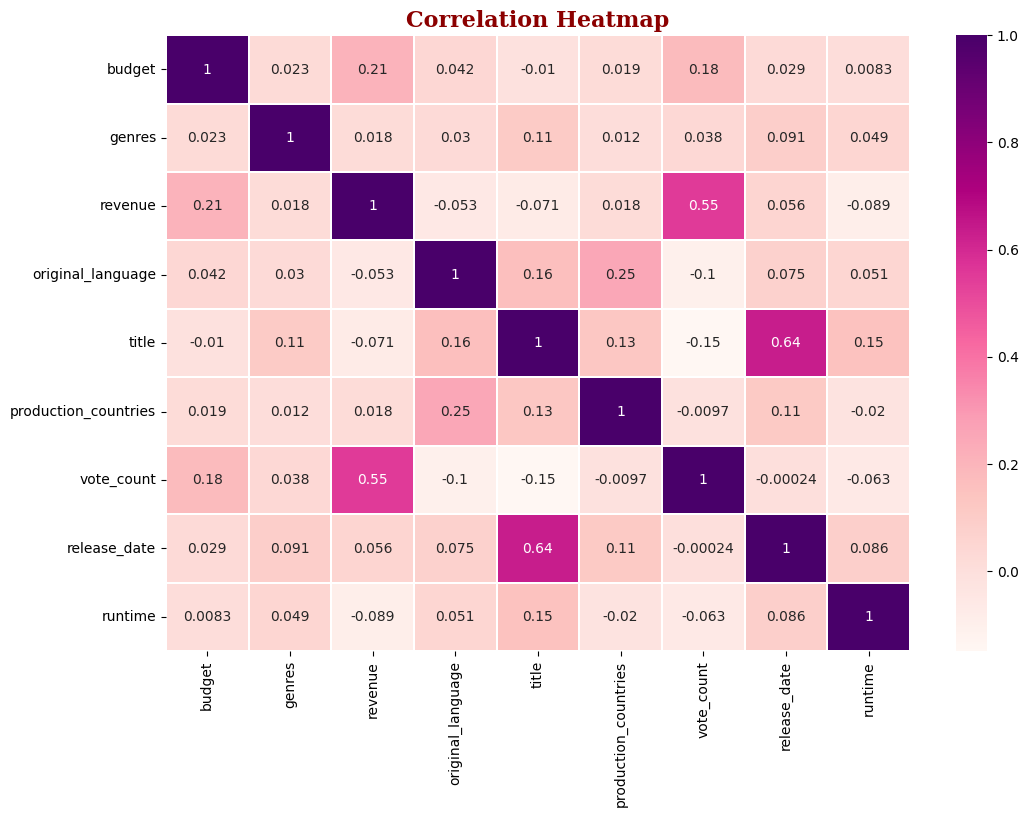

In [17]:
# Heatmap showing the correlation among different variables
plt.figure(figsize=(12, 8))
heat_data_mov_key= data_mov_key[["budget", "genres", "revenue", "original_language", "title", "production_countries", "vote_count", "release_date", "runtime", ]]
corr = heat_data_mov_key.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
                 linewidths=.2, cmap="RdPu", annot=True)
title_font = {'family': 'serif', 'color': 'darkred', 'weight': 'bold', 'size': 16}
plt.title("Correlation Heatmap", fontdict=title_font)
plt.show()

From the above Heatmap, we can analyze that:
* Budget & Revenue have a positive correlation i.e. higher the budget, higher
the revenue
* Revenue & Vote Count have a positive correlation as well, therefore we can suggest that successful movies were widely reviewed and received more votes in total.
* Budget & Vote Count also show a positive correlation. A possible explaination could be that movies with higher budgets may have a higher revenue and more promotions, thus, they are more well-known and have more vote counts.
* Revenue & Runtime have a slight negative correlation. Shorter movies performed better on average.
* Vote count & Runtime also have a slight negative correlation. Longer movies tend to have less vote counts.


# **Q1. How has runtime changed over the last century?**

Let's investigate how the duration of movies has changed in the last 10 decades from 1920 to 2020. As the technology in the film industry has been thriving over the past century, we wonder if the runtime also changes due to the development of special effects and people’s increased leisure time.


In [18]:
# Sort the 'release_date' column to see when the first and last movies were released
# Use this information to decide what timeframe should be covered to answer Q1

data_mov_key.sort_values('release_date')

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords
35011,nan,0,Documentary,315946,0.0,xx,Passage of Venus,Passage de Venus,,"FR, France",19.0,6.0,1874-12-09,1.0,xx No Language,"silent film, science, astronomy, venus..."
35008,nan,0,Documentary,194079,0.0,en,Sallie Gardner at a Gallop,Sallie Gardner at a Gallop,Palo Alto Stock Farm,"US, United States of America",25.0,6.2,1878-06-14,1.0,xx No Language,"horse, stop motion, animation, black a..."
42625,nan,0,Documentary,426903,0.0,en,Buffalo Running,Buffalo Running,,"US, United States of America",7.0,5.4,1883-11-19,1.0,xx No Language,"running, buffalo, photography, black a..."
35004,nan,0,Documentary,159897,0.0,xx,Man Walking Around a Corner,Man Walking Around a Corner,,"US, United States of America",17.0,4.1,1887-08-18,1.0,xx No Language,"walking, black and white, short"
35005,nan,0,Documentary,96882,0.0,xx,Accordion Player,Accordion Player,Whitley Partners,"GB, United Kingdom",18.0,4.4,1888-01-01,1.0,xx No Language,"musician, silent film"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45558,nan,0,Drama,412059,0.0,en,Mobile Homes,Mobile Homes,,"FR, France, CA, Canada",1.0,0.0,2018-04-04,105.0,en English,
39156,nan,0,"Drama, Romance",332283,0.0,en,Mary Shelley,Mary Shelley,Parallel Films Bord Scannan na hEireann / I...,"IE, Ireland, LU, Luxembourg, GB, United ...",1.0,0.0,2018-04-25,0.0,en English,woman director
30472,Bad Boys Collection,0,"Thriller, Action, Crime",38700,0.0,en,Bad Boys for Life,Bad Boys for Life,Columbia Pictures Sony Pictures Jerry Bru...,"US, United States of America",12.0,0.0,2018-11-07,0.0,en English,"adventure, sequel, police officer"
39910,nan,12000000,"Comedy, Drama",299782,0.0,en,The Other Side of the Wind,The Other Side of the Wind,"""Les Films de lAstrophore"" SACI","IR, Iran, US, United States of America",1.0,0.0,2018-12-31,0.0,en English,"1970s, comeback, satire, movie in movi..."


Then, the 'release_date' column is sorted so that a decision can be made about what time frame from this dataset was needed to see the trend in 'runtime'.

In [19]:
# Keep only the 'release_date' and 'runtime' columns because the other columns are not needed for this problem

q1_data_mov_key = data_mov_key[['release_date', 'runtime']]
q1_data_mov_key

,release_date,runtime
0,1995-10-30,81.0
1,1995-12-15,104.0
2,1995-12-22,101.0
3,1995-12-22,127.0
4,1995-02-10,106.0
...,...,...
46478,2000-10-03,30.0
46479,1995-01-01,85.0
46480,1991-05-13,104.0
46483,2003-08-01,90.0


A 100-year timespan split by decades provides enough evidence to see the correlation of time period and duration of movies, so we are going to focus on movies from 1920 to 2020.

In [20]:
# Drop values from before 1920

movies_after_1920 = q1_data_mov_key[data_mov_key['release_date'] >= '1920-1-1']
movies_after_1920.sort_values('release_date')

,release_date,runtime
16417,1920-10-27,20.0
8330,1920-10-28,85.0
16434,1920-12-22,19.0
16435,1920-12-22,18.0
8333,1921-01-01,106.0
...,...,...
45558,2018-04-04,105.0
39156,2018-04-25,0.0
30472,2018-11-07,0.0
39910,2018-12-31,0.0


For easier calculations of average runtime for each decade, we segment the 'release_date' column into 10 decade groups.

In [21]:
# Segment the 'release_date' column into 10 decade groups
# Because our data ends at 2020-12-16, we include the data of 2020 into movies_2010s

movies_20s = q1_data_mov_key[(q1_data_mov_key['release_date'] >= '1920-1-1') & (q1_data_mov_key['release_date'] < '1930-1-1')]
movies_30s = q1_data_mov_key[(q1_data_mov_key['release_date'] >= '1930-1-1') & (q1_data_mov_key['release_date'] < '1940-1-1')]
movies_40s = q1_data_mov_key[(q1_data_mov_key['release_date'] >= '1940-1-1') & (q1_data_mov_key['release_date'] < '1950-1-1')]
movies_50s = q1_data_mov_key[(q1_data_mov_key['release_date'] >= '1950-1-1') & (q1_data_mov_key['release_date'] < '1960-1-1')]
movies_60s = q1_data_mov_key[(q1_data_mov_key['release_date'] >= '1960-1-1') & (q1_data_mov_key['release_date'] < '1970-1-1')]
movies_70s = q1_data_mov_key[(q1_data_mov_key['release_date'] >= '1970-1-1') & (q1_data_mov_key['release_date'] < '1980-1-1')]
movies_80s = q1_data_mov_key[(q1_data_mov_key['release_date'] >= '1980-1-1') & (q1_data_mov_key['release_date'] < '1990-1-1')]
movies_90s = q1_data_mov_key[(q1_data_mov_key['release_date'] >= '1990-1-1') & (q1_data_mov_key['release_date'] < '2000-1-1')]
movies_00s = q1_data_mov_key[(q1_data_mov_key['release_date'] >= '2000-1-1') & (q1_data_mov_key['release_date'] < '2010-1-1')]
movies_2010s = q1_data_mov_key[(q1_data_mov_key['release_date'] >= '2010-1-1') & (q1_data_mov_key['release_date'] < '2020-12-31')]

Then, we calculate the average runtime for each decade from 1920 to 2020.

In [22]:
# Calculate the mean of 'runtime' for each decade group

runtime_20s = movies_20s['runtime'].mean()
runtime_30s = movies_30s['runtime'].mean()
runtime_40s = movies_40s['runtime'].mean()
runtime_50s = movies_50s['runtime'].mean()
runtime_60s = movies_60s['runtime'].mean()
runtime_70s = movies_70s['runtime'].mean()
runtime_80s = movies_80s['runtime'].mean()
runtime_90s = movies_90s['runtime'].mean()
runtime_00s = movies_00s['runtime'].mean()
runtime_2010s = movies_2010s['runtime'].mean()

A new table is now created for average runtime for each decade from 1920 to 2020 for the purpose of generating the graph.

In [23]:
# Make a new table for the mean calculated for each decade

q1_data = {'Decade': ['1920s','30s','40s','50s','60s','70s','80s','90s','00s','2010s'], 'Runtime (minutes)': [runtime_20s, runtime_30s,runtime_40s,runtime_50s,runtime_60s,runtime_70s,runtime_80s,runtime_90s,runtime_00s,runtime_2010s,]}

In [24]:
# The new table q1_df is ready for graphing

q1_df = pd.DataFrame(q1_data)
q1_df

,Decade,Runtime (minutes)
0,1920s,80.719064
1,30s,82.688312
2,40s,91.325773
3,50s,92.596154
4,60s,98.053150
5,70s,100.027343
6,80s,98.136919
7,90s,100.461024
8,00s,97.737292
9,2010s,94.512610


A line chart is the best way to show the trend of how duration has changed over 100 years, and we draw the graph using q1_df.

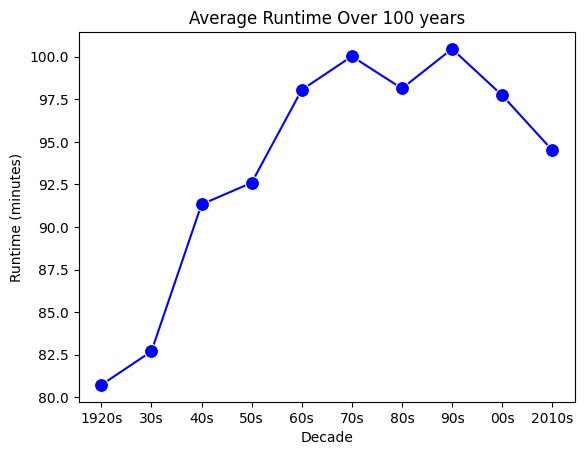

In [25]:
# Graph - line chart using seaborn

sns.lineplot(x= 'Decade', y= 'Runtime (minutes)', data= q1_df, color='blue', marker='o', markersize=10)
plt.title('Average Runtime Over 100 years')
plt.show()

This linechart demonstrates a trend in runtime over 100 years. There was a sharp rise in average runtime for movies from the 1920s until the 1970s. This rise could have been due to technological advancements in filmmaking. After the 1970s, there was a downward trend in the average duration of movies. This could be due to customers preferring movies that are about 1.5 hours. This preference could have led to longer movies not being as popular.

---


# **Q2: What Are the Key Factors Impacting Movie Revenue?: Budget, Production Companies, Production Country, Spoken Languages, and Collection Continuation**

Revenue is a big part of films as it somehow reflects a movie’s performance and audience’s preferences. Therefore, we decided to look into factors that might have correlations with revenues, and see how they were correlated with them.

Since the original dataset provides data from various aspects, we will work on budgets, production companies, production countries, number of languages spoken in a movie, and parts of a movie collection to see how they correlate with revenue.

For our interest, we also want to  investigate if there is any correlation between the number of votes from the audience and the number of languages spoken in a movie, as we assume that with more languages a movie included, the movie could be more widespread and thus had more votes.


## *Q2.1 What Is the Relationship Between Movie Budget and Movie Revenue?*

First, let's investigate the correlation between movie budgets and movie revenues, as we were curious if a movie could have higher revenues if more money was invested in, as it might be able to have better actors, better special effects, and more promotions. We decide to run a regression line between these two variables to look at the relationship.

Before studying this correlation, we need to clean the data again.

After careful observation of the datasets, we find that there are invalid values in the 'budget' and 'revenue' columns. Due to this, the invalid values in these columns should be dropped.

In [26]:
# Drop the null values of the listed columns
# The null values of the 'runtime' column were not deleted for Q2

data_mov_key.dropna(subset=['release_date', 'original_language', 'title', 'production_companies', 'production_countries', 'vote_count'], inplace=True)
data_mov_key

<ipython-input-26-20e9c18bb6fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mov_key.dropna(subset=['release_date', 'original_language', 'title', 'production_companies', 'production_countries', 'vote_count'], inplace=True)


,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords
0,Toy Story Collection,30000000,"Animation, Comedy, Family",862,373554033.0,en,Toy Story,Toy Story,Pixar Animation Studios,"US, United States of America",5415.0,7.7,1995-10-30,81.0,en English,"jealousy, toy, boy, friendship, frie..."
1,nan,65000000,"Adventure, Fantasy, Family",8844,262797249.0,en,Jumanji,Jumanji,TriStar Pictures Teitler Film Interscope ...,"US, United States of America",2413.0,6.9,1995-12-15,104.0,en English fr Français,"board game, disappearance, ""based on chi..."
2,Grumpy Old Men Collection,0,"Romance, Comedy",15602,0.0,en,Grumpier Old Men,Grumpier Old Men,Warner Bros. Lancaster Gate,"US, United States of America",92.0,6.5,1995-12-22,101.0,en English,"fishing, best friend, duringcreditssting..."
3,nan,16000000,"Comedy, Drama, Romance",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,Twentieth Century Fox Film Corporation,"US, United States of America",34.0,6.1,1995-12-22,127.0,en English,"based on novel, interracial relationship, ..."
4,Father of the Bride Collection,0,Comedy,11862,76578911.0,en,Father of the Bride Part II,Father of the Bride Part II,Sandollar Productions Touchstone Pictures,"US, United States of America",173.0,5.7,1995-02-10,106.0,en English,"baby, mlife crisis, confence, aging, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46478,nan,0,Horror,289923,0.0,en,The Burkittsville 7,The Burkittsville 7,Neptune Salad Entertainment Pirie Productio...,"US, United States of America",1.0,7.0,2000-10-03,30.0,en English,"witch, mythology, legend, serial kille..."
46479,nan,0,Science Fiction,222848,0.0,en,Caged Heat 3000,Caged Heat 3000,Concorde-New Horizons,"US, United States of America",1.0,3.5,1995-01-01,85.0,en English,
46480,nan,0,"Drama, Action, Romance",30840,0.0,en,Robin Hood,Robin Hood,Westdeutscher Rundfunk (WDR) Working Title ...,"CA, Canada, DE, Germany, GB, United King...",26.0,5.7,1991-05-13,104.0,en English,
46483,nan,0,"Action, Drama, Thriller",67758,0.0,en,Betrayal,Betrayal,American World Pictures,"US, United States of America",6.0,3.8,2003-08-01,90.0,en English,


In order to graph the 'budget' column values, convert it from 'object' to type 'float64'


In [27]:
# Convert the 'budget' column from 'object' to 'float64'
data_mov_key['budget'] = data_mov_key.budget.astype('float64')
data_mov_key.info()

<ipython-input-27-e28ac5658aa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mov_key['budget'] = data_mov_key.budget.astype('float64')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41395 entries, 0 to 46485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  41395 non-null  object 
 1   budget                 41395 non-null  float64
 2   genres                 41395 non-null  object 
 3   id                     41395 non-null  object 
 4   revenue                41395 non-null  float64
 5   original_language      41395 non-null  object 
 6   title                  41395 non-null  object 
 7   original_title         41395 non-null  object 
 8   production_companies   41395 non-null  object 
 9   production_countries   41395 non-null  object 
 10  vote_count             41395 non-null  float64
 11  vote_average           41395 non-null  float64
 12  release_date           41395 non-null  object 
 13  runtime                41395 non-null  float64
 14  spoken_languages       41395 non-null  object 
 15  ke

After conducting further research, we decide to drop the values that are less than 1,000 and less than 10,000 in the 'budget' and 'revenue' columns, respectively.

After going back to the dataset and looking into multiple values that are lower than 1,000 on the 'budget' column, we find that most of them are not correct values. The same steps are repeated for multiple values that are less than 10,000 on the 'revenue' column, therefore, we drop those values.

In [28]:
# Drop values from the 'budget' column that are less than or equal to 1,000
# Drop values from the 'revenue' column that are less than or equal to 10,000

data_mov_key = data_mov_key[(data_mov_key['budget'] >= 1000) & (data_mov_key['revenue'] >= 10000)]
data_mov_key

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords
0,Toy Story Collection,30000000.0,"Animation, Comedy, Family",862,373554033.0,en,Toy Story,Toy Story,Pixar Animation Studios,"US, United States of America",5415.0,7.7,1995-10-30,81.0,en English,"jealousy, toy, boy, friendship, frie..."
1,nan,65000000.0,"Adventure, Fantasy, Family",8844,262797249.0,en,Jumanji,Jumanji,TriStar Pictures Teitler Film Interscope ...,"US, United States of America",2413.0,6.9,1995-12-15,104.0,en English fr Français,"board game, disappearance, ""based on chi..."
3,nan,16000000.0,"Comedy, Drama, Romance",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,Twentieth Century Fox Film Corporation,"US, United States of America",34.0,6.1,1995-12-22,127.0,en English,"based on novel, interracial relationship, ..."
5,nan,60000000.0,"Action, Crime, Drama, Thriller",949,187436818.0,en,Heat,Heat,Regency Enterprises Forward Pass Warner B...,"US, United States of America",1886.0,7.7,1995-12-15,170.0,en English es Español,"robbery, detective, bank, obsession, ..."
8,nan,35000000.0,"Action, Adventure, Thriller",9091,64350171.0,en,Sudden Death,Sudden Death,Universal Pictures Imperial Entertainment ...,"US, United States of America",174.0,5.5,1995-12-22,106.0,en English,"terrorist, hostage, explosive, vice pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46188,nan,11000000.0,"Action, Crime, Mystery, Thriller",395834,184770205.0,en,Wind River,Wind River,Thunder Road Pictures Star Thrower Entertai...,"GB, United Kingdom, US, United States of A...",181.0,7.4,2017-08-03,111.0,en English,"rape, mountain, gun, investigation, ..."
46271,nan,12000000.0,"Action, Comedy, Drama",24049,19000000.0,ta,Sivaji: The Boss,சிவாஜி,AVM Productions,"IN, India",25.0,6.9,2007-06-14,185.0,ta தமிழ் te తెలుగు,"black money, corrupt politician, educati..."
46429,nan,800000.0,"Comedy, Drama",62757,1328612.0,en,Savages,Dikari,,,6.0,5.8,2006-11-23,100.0,ru Pусский,
46432,nan,2000000.0,"Romance, Drama",63281,1268793.0,en,Pro Lyuboff,Про любоff,Profit,"RU, Russia",3.0,4.0,2010-09-30,107.0,ru Pусский,


Scatterplots are used to demonstrate correlation and the regression line allowed for a picture of a clearer trend. Therefore, in order to clearly showcase the correlation, we choose to use a scatterplot and also add a regression line. We also set apart millions and billions of dollars on the axes with the help from Gen AI for readability.

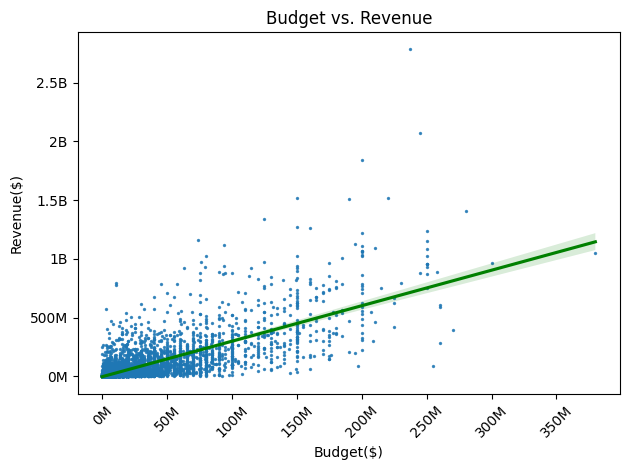

In [29]:
# Graph a regression line to show how 'budget' affects 'revenue'
# Define axes, set size for scatter markers, set the color of the regression line for differentiation
# To make the graph more readible, abbreviate millions and billions
# Set axes labels and title for clarity

fig, ax = plt.subplots()
sns.regplot(x = data_mov_key['budget'], y = data_mov_key['revenue'], scatter_kws={'s':2}, line_kws={'color':'green'})
def abbre(value, _):
    if value < 1e9:
        return f"{value/1e6:.0f}M"
    else:
        billion_value = value/1e9
        if billion_value == int(billion_value):
            return f"{billion_value:.0f}B"
        else:
            return f"{billion_value:.1f}B"
ax.xaxis.set_major_formatter(plt.FuncFormatter(abbre))
ax.yaxis.set_major_formatter(plt.FuncFormatter(abbre))
plt.xticks(rotation=45)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget($)')
plt.ylabel('Revenue($)')
plt.tight_layout()
plt.show()

This graph shows the relationship between budget and revenue, and it is clear from the graph that as the budget increases, the revenue tends to increase. Most of the data points are centered around the regression line, indicating a strong positive correlation. Additionally, although most of the data points are close to the trend line, there are some data points that are far from the line, suggesting that the relationship between revenues and budgets for these programs may be influenced by other factors, providing valuable exceptions from the positive correlation.
Perhaps it is because movies with higher budgets can spend more on promotion, so the revenues also become higher. More people know about them, therefore more people actually go to the theaters to watch it when it comes out. "Barbie" and "Oppenheimer" would be great examples of this.


---

## *Q2.2 What Are the Top 5 Production Companies in the 21st Century Based on Revenue?*

In the 21st century, the movie industry has evolved significantly. We want to find out which five production companies have contributed the most to the worldwide film revenue yet.

To start, we need to convert the release_date column into a datetime format and extract the "year" specifically.

In [30]:
# Convert the 'release_date' column to a datetime format
data_mov_key['release_date'] = pd.to_datetime(data_mov_key['release_date'])
# Extract the year from the 'release_date' column
data_mov_key['release_year'] = data_mov_key['release_date'].dt.year

<ipython-input-30-800dd702c286>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mov_key['release_date'] = pd.to_datetime(data_mov_key['release_date'])
<ipython-input-30-800dd702c286>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mov_key['release_year'] = data_mov_key['release_date'].dt.year


For this objective, we only want to work with 21st century movies.

In [31]:
# Filter the data to include only movies released in the 21st century (2000 and beyond)
data_21st_century = data_mov_key[data_mov_key['release_year'] >= 2000]

Let's see how much revenue each production company has earned since year 2000.

In [32]:
# Group the data by production companies and calculate the total revenue in millions
grouped_data = data_21st_century.groupby('production_companies')['revenue'].sum().reset_index()
grouped_data['revenue'] = grouped_data['revenue'] / 1e6  # Convert revenue to millions

We want to take a look at the top 5 production companies by revenue in the 21st century.

In [33]:
# Sort the data by total revenue in descending order
sorted_data = grouped_data.sort_values(by='revenue', ascending=False)
# Get the top 5 production companies based on total revenue
top5_production_companies = sorted_data.head(5)

Finally, let's create a visualization for a better understanding of the titans of the 21st-century movie industry.

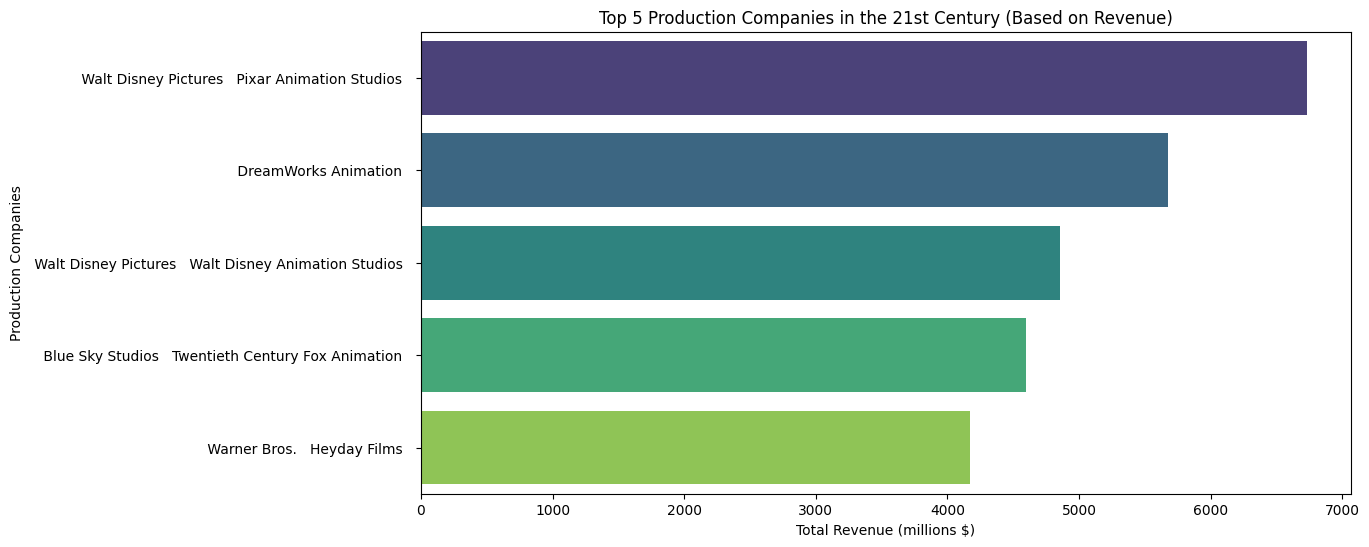

In [34]:
# Create a bar chart to visualize the top 5 production companies based on revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='production_companies', data=top5_production_companies, palette='viridis')
plt.title('Top 5 Production Companies in the 21st Century (Based on Revenue)')
plt.xlabel('Total Revenue (millions $)')
plt.ylabel('Production Companies')
plt.show()

Disney, in collaboration with Pixar, stands out as the undisputed leader of the 21st century cinema production. Several animations come to mind such as Cars, Toy Story, and the beloved Ratatouille.

Dreamworks follows closely in the second place with such memorable names as Shrek, Kung Fu Panda, and Madagascar.

Disney Animation secured the third spot, taking advantage of the nostalgia by making such successful movies as Frozen and Frozen 2.

Blue Sky, in partnership with 20th Century Fox, takes the fourth position having Ice Age and Rio under its belt.

Marvel Studios finishes up the top five with such household names as The Avengers and Iron Man.

## *Q2.3 What Are the Top 5 Production Companies in the 20th Century Based on Revenue?*

Now, let's go back in time for the previous century and see which production companies were "ruling the world" back then.

Once again, we will start with transforming the data for our current objectives.

In [35]:
# Convert the 'release_date' column to a datetime format
data_mov_key['release_date'] = pd.to_datetime(data_mov_key['release_date'])
# Extract the year from the 'release_date' column
data_mov_key['release_year'] = data_mov_key['release_date'].dt.year

<ipython-input-35-800dd702c286>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mov_key['release_date'] = pd.to_datetime(data_mov_key['release_date'])
<ipython-input-35-800dd702c286>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mov_key['release_year'] = data_mov_key['release_date'].dt.year


We only want to look at movies created in the 20th century (1900-1999).

In [36]:
# Filter the data to include only movies released in the 20th century (1900-1999)
data_20th_century = data_mov_key[(data_mov_key['release_year'] >= 1900) & (data_mov_key['release_year'] <= 1999)]

Grouping by production companies by sum of revenue in that time period, we will get our results available.

In [37]:
# Group the data by production companies and calculate the total revenue in millions
production_company_revenue = data_20th_century.groupby('production_companies')['revenue'].sum().reset_index()
production_company_revenue['revenue'] = production_company_revenue['revenue'] / 1e6  # Convert revenue to millions

In [38]:
# Sort the data by total revenue in descending order
top5_production_companies_revenue = production_company_revenue.sort_values(by='revenue', ascending=False).head(5)

Finally, let's look at the 5 most successful movie production companies of the 20th century.

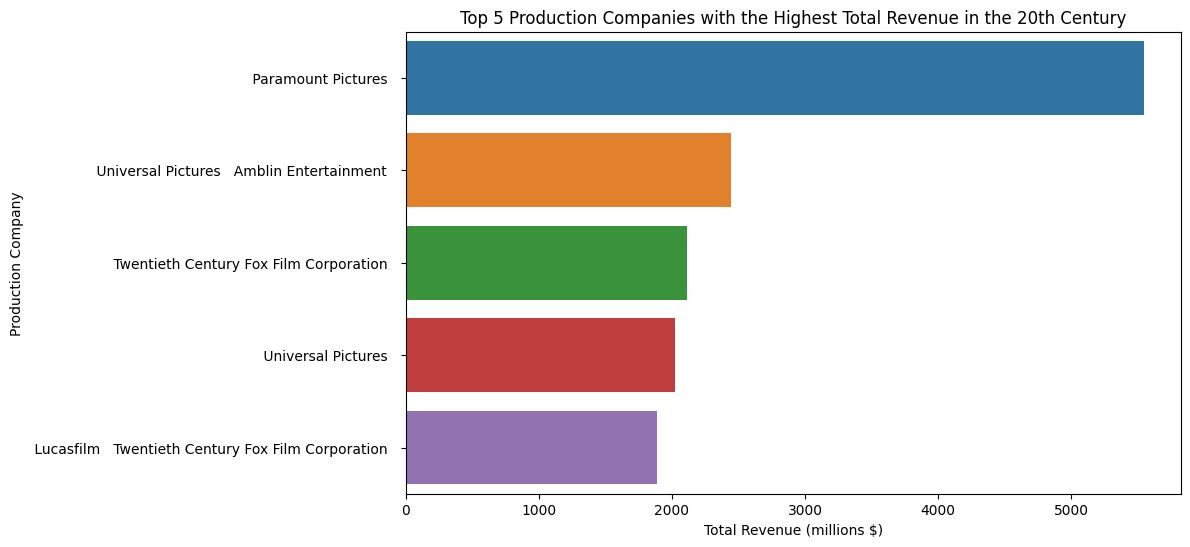

In [39]:
# Create a bar plot to visualize the top 5 production companies with the highest total revenue in the 20th century
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='production_companies', data=top5_production_companies_revenue)
plt.title('Top 5 Production Companies with the Highest Total Revenue in the 20th Century')
plt.xlabel('Total Revenue (millions $)')
plt.ylabel('Production Company')
plt.show()

As we can see, the distribution definitely differs from the 21st century, with Paramount Pictures producing immensely successful movies such as Titanic, Mission: Impossible, and Forrest Gump.

Universal Pictures holds the silver medal of 20th century movie success, mainly due to the beuaitfdul mind of Steven Spielberg: Jurassic Park, E.T., and Jaws.

Amblin Entertainment got the bronze with such 80s icons as Gremlins, Poltergeist, and Back to the Future.

20th Century Fox proves its name by taking the fourth places with such giants as the Star Wars movies and everyone's Christmas favorite Home Alone.

Warner Brothers are closing out the top 5 with worldwide successes of The Matrix, The Green Mile, and the Batman Movies.

## *Q2.4 How Does Average Movie Revenue Vary by Production Country Over Time?*


Countries is also a factor that we are interested in. Wondering about which countries made the highest average revenue from movies in the past century, we work on the production countries and their corresponding revenues, and generate an interactive graph to see average revenue by different countries.

First, we clean and prepare the data for working.

In [40]:
# Clean and prepare the data for getting the revenue of production countries
country_revenue = data_mov_key[['id', 'production_countries', 'revenue']].copy()
country_revenue.dropna(inplace=True)

In [41]:
# Keep the revenue > 10,000 only
country_revenue = country_revenue[country_revenue['revenue'] >= 10000]
country_revenue

,id,production_countries,revenue
0,862,"US, United States of America",373554033.0
1,8844,"US, United States of America",262797249.0
3,31357,"US, United States of America",81452156.0
5,949,"US, United States of America",187436818.0
8,9091,"US, United States of America",64350171.0
...,...,...,...
46188,395834,"GB, United Kingdom, US, United States of A...",184770205.0
46271,24049,"IN, India",19000000.0
46429,62757,,1328612.0
46432,63281,"RU, Russia",1268793.0


For better working on the production_countries column, we drop the country codes in the column since they are extra information.

In [42]:
# Since the column contains both country codes and country names, drop the country codes to further work on the data
# Use the help of Gen AI to strip item that has a length of 2
country_revenue['production_countries'] = country_revenue['production_countries'].apply(lambda x: ', '.join([item.strip() for item in x.split(',') if len(item.strip()) > 2]))

For those movies that are produced by multiple countries, we split each country out of the original column, and assign each of the countries the same amount of revenue.

In [43]:
# Lots of movies have several production countries
# Create a new column spliting them into single rows
# Each country splitted from the same production countries lists have the same revenue for easier calculations
country_revenue['countries'] = country_revenue['production_countries'].str.split(', ')
country_revenue = country_revenue.explode('countries')

country_revenue

,id,production_countries,revenue,countries
0,862,United States of America,373554033.0,United States of America
1,8844,United States of America,262797249.0,United States of America
3,31357,United States of America,81452156.0,United States of America
5,949,United States of America,187436818.0,United States of America
8,9091,United States of America,64350171.0,United States of America
...,...,...,...,...
46188,395834,"United Kingdom, United States of America, Canada",184770205.0,Canada
46271,24049,India,19000000.0,India
46429,62757,,1328612.0,
46432,63281,Russia,1268793.0,Russia


In [44]:
country_revenue.dropna(inplace = True)

Then, we calculate the average movie revenue for each country.

In [45]:
# Calculate the mean revenue for each country
country_rev = country_revenue.groupby('countries')['revenue'].mean()
country_rev = country_rev.reset_index(name = 'revenue')
country_rev

,countries,revenue
0,,5.458638e+06
1,Algeria,1.194262e+07
2,Angola,9.801700e+04
3,Argentina,1.435741e+07
4,Australia,9.388211e+07
...,...,...
75,United Arab Emirates,1.077406e+08
76,United Kingdom,1.093852e+08
77,United States of America,1.062401e+08
78,Uruguay,1.637945e+08


To make the treemap more organized and have the continent information, we add a column of continent for all the countries. Also, for a better visual for the graph, we add another column called 'world' to include all the continents in it.

The help of Gen AI is used here for generating the 'continent' column faster.

In [46]:
# To have a more organized graph, create a new column of continent to group countries together
# To generate the column more quickly, use the help of Gen AI to find the code which helps with transforming country names into codes, then into continent names
!pip install pycountry_convert
import pycountry_convert as pc
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 57.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 14.2 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=9dda9a8beb8221bfdc511174f5f468f923e094ac2cadd1b294be0d5fae4b37ff
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [47]:
def get_continent(country_name):
    try:
        country_alpha2 = country_name_to_country_alpha2(country_name)
        continent_code = country_alpha2_to_continent_code(country_alpha2)
        return continent_code
    except Exception as e:
        print(f"Error: {e}")
        return None

country_rev['continent'] = country_rev['countries'].apply(get_continent)

Error: "Invalid Country Name: ''"
Error: "Invalid Country Name: 'Serbia and Montenegro'"


In [48]:
country_rev['world'] = 'World'

There are cells that are not assigned to a continent, and let's just simply drop them.

In [49]:
# Drop null values and countries rows that were not assigned to a continent
countries_to_exclude = [" ","''", "Palestinian Territory", "Serbia and Montenegro"]
country_rev = country_rev[~country_rev['countries'].isin(countries_to_exclude)]
country_rev.dropna(inplace = True)
country_rev

<ipython-input-49-a0471707e105>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_rev.dropna(inplace = True)


,countries,revenue,continent,world
1,Algeria,1.194262e+07,AF,World
2,Angola,9.801700e+04,AF,World
3,Argentina,1.435741e+07,SA,World
4,Australia,9.388211e+07,OC,World
5,Austria,1.786554e+07,EU,World
...,...,...,...,...
75,United Arab Emirates,1.077406e+08,AS,World
76,United Kingdom,1.093852e+08,EU,World
77,United States of America,1.062401e+08,NA,World
78,Uruguay,1.637945e+08,SA,World


Having all the data ready, we can create the interactive treemap.

In [50]:
# Draw the treemap which shows average revenue for each country over time
tree_fig = px.treemap(country_rev, path=['world', 'continent', 'countries'], values='revenue', color = 'revenue', color_continuous_scale='RdBu',
                      custom_data=['revenue'])

tree_fig.update_traces(hovertemplate='Average Revenue: %{customdata[0]:,.2f}')

tree_fig.update_layout(
    title = 'Average Movie Revenue by Production Country over time',
    coloraxis_colorbar=dict(title='Average Revenue'),
    margin=dict(t=50, l=25, r=25, b=25))

tree_fig.show()

From the graph, we can see that the countries with the highest mean movie revenues over time are Malta and Slovenia from Europe. By moving the mouth around and clicking on country or continent names, we can see the exact amount or what countries are included. The color bar on the right shows a continuous color range for revenues from 0 million to 400 million, and on the graph the colors and sizes applied to the country names clearly illustrates how each country's mean revenue is compared to others'.

For movies with multiple production countries, for the purpose of generating this graph more easily, each country was assigned the same amount of total revenue. Despite the revenue each production country receives, the mean revenue can also be affected by the number of movies created by each country, as the more of the movies a country produces, the larger the denominator. That could be the reason why the country with the highest mean revenue is not the country with the highest sum revenue in this dataset.

## *Q2.5 Does the Amount of Spoken Languages in a Film Influence its Success?*

If a movie includes several spoken languages, does it become more successful among the viewers? Let's think of some movies that included several spoken languages, usually combined with English. In 1995's Braveheart there is a  scene of a meeting with a French King to secure England's alliance with France, therefore Braveheart has two spoken languages.

We start by creating a dataframe with the 'revenue' and 'spoken_languages' columns to investigate the relationship between the two attributes.

In [51]:
# Select 'revenue' and 'spoken_languages' columns from the merged dataset
spoken_lang_revenue= data_mov_key[['revenue', 'spoken_languages']]
spoken_lang_revenue


,revenue,spoken_languages
0,373554033.0,en English
1,262797249.0,en English fr Français
3,81452156.0,en English
5,187436818.0,en English es Español
8,64350171.0,en English
...,...,...
46188,184770205.0,en English
46271,19000000.0,ta தமிழ் te తెలుగు
46429,1328612.0,ru Pусский
46432,1268793.0,ru Pусский


Because we cleaned the 'spoken_languages' column in the cleaning section, we were able to see that each language had a two lowercase letter code. We imported the regular expressions module and created a function that could identify the pattern of two lowercase letters, which was found with the help of ChatGPT. We then obtained the average revenue of movies with each amount of languages spoken.

In [52]:
# Import re for regular expressions in Python
import re
# Define a regular expression pattern of 2 lowercase letters to get a two-letter
# country code (e.g. 'en')
pattern = r'\b[a-z]{2}\b'
# Find all 2 lowercase letters in the 'spoken_languages' column in the dataframe
two_letter_lang = spoken_lang_revenue['spoken_languages'].str.findall(pattern)
# Create a function that can count the number of language codes
def count_two_letters(language_code):
  return len(language_code)
# Apply the function to each row in the column
spoken_lang_revenue['num_languages'] = two_letter_lang.apply(count_two_letters)


<ipython-input-52-a60f434f6dca>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We created a barplot because that allowed for the best visualization of revenue per number of languages spoken.

In [53]:
# Get the mean value of revenue per language
avg_rev_by_lang_count = spoken_lang_revenue.groupby('num_languages')['revenue'].mean().reset_index()
avg_rev_by_lang_count


,num_languages,revenue
0,1,8.975326e+07
1,2,8.790155e+07
2,3,9.760230e+07
3,4,1.184718e+08
4,5,1.536973e+08
5,6,2.423279e+08
6,7,1.807110e+08
7,8,5.178603e+07
8,9,2.620185e+08


<ipython-input-54-b3f10442d7bd>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




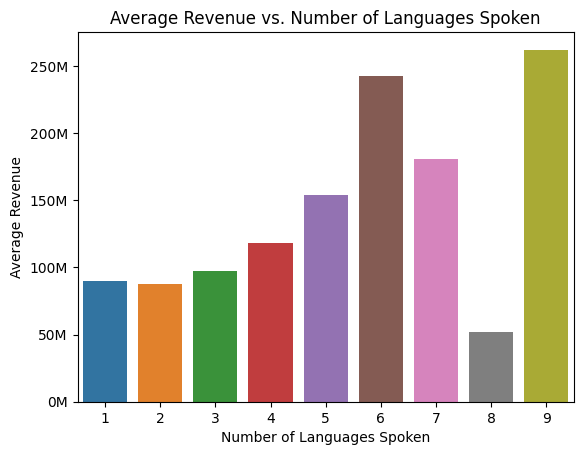

In [54]:
fig, ax = plt.subplots()
sns.barplot(data=avg_rev_by_lang_count, x='num_languages', y='revenue', ci=None)
def abbre(value, _):
    if value < 1e9:
        return f"{value/1e6:.0f}M"
    else:
        billion_value = value/1e9
        if billion_value == int(billion_value):
            return f"{billion_value:.0f}B"
        else:
            return f"{billion_value:.1f}B"
ax.yaxis.set_major_formatter(plt.FuncFormatter(abbre))
plt.xlabel('Number of Languages Spoken')
plt.ylabel('Average Revenue')
plt.title('Average Revenue vs. Number of Languages Spoken')
plt.show()


These results indicate that the more languages a movie contains, the more revenue they tend to receive. Although when a movie contains 7 and 8 languages, it does not follow this incline. This could be due to the fact that people of different ethnicities and backgrounds feel more obliged to see movies that possibly contain their language of origin.

## Q2.6 *How Does the Number of Spoken Languages in a Movie Affect Its Popularity Among the Viewers?*

We wanted to see how the amount of languages spoken influenced how many votes a movie got. We took the same steps as before and found the average amount of votes per amount of languages spoken.

In [55]:
# Select 'vote_count' and 'spoken_languages' columns from the dataset
vote_lang = data_mov_key[['vote_count', 'spoken_languages']]
# Apply the same pattern from above to the column
vote_lang['num_languages'] = two_letter_lang.apply(count_two_letters)
avg_vote_count_lang = vote_lang.groupby('num_languages')['vote_count'].mean().reset_index()
avg_vote_count_lang


<ipython-input-55-355d0790d16e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,num_languages,vote_count
0,1,727.783902
1,2,687.491405
2,3,832.401070
3,4,1116.435714
4,5,1158.854839
5,6,1661.227273
6,7,483.500000
7,8,704.000000
8,9,1785.000000


Similar to the revenue and spoken languages visualization, we concluded that this relationship would be best demonstrated through a bar chart.

<ipython-input-56-6efce9b25332>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




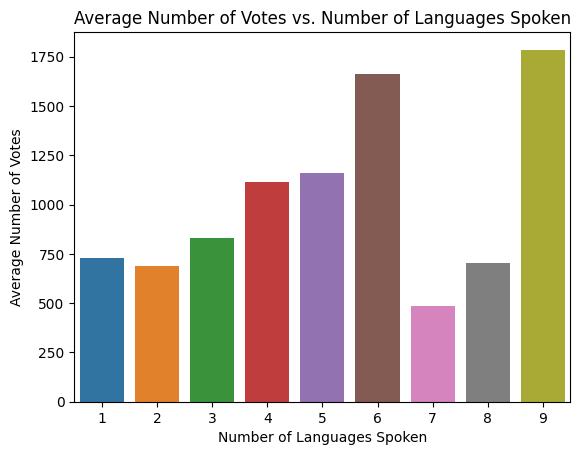

In [56]:
sns.barplot(data=avg_vote_count_lang, x='num_languages', y='vote_count', ci=None)
plt.xlabel('Number of Languages Spoken')
plt.ylabel('Average Number of Votes')
plt.title('Average Number of Votes vs. Number of Languages Spoken')
plt.show()


Similar to the correlation between revenue and languages, the same trend is seen with the number of votes. The number of votes tends to increase as the more languages are spoken in movies. However, for 7 and 8, the number of votes does not increase.

## *Q2.7 How Does Revenue Vary by Parts of the Same Film Collection?*

A lot of the films within our dataset belong to a larger cinematic collection such as "Toy Story Collection" or "Harry Potter Collection". In most cases, every part after the first one can be considered a "sequel" or a narrative extension, building up on the original storyline.

In the part below, we are exploring a pattern of revenue rising/dropping with each following part within a movie collection. We will see whether later parts of collections acquire more success by having the foundation of the success of earlier movier or, on the opposite, their success dies down with each consequent part since the story gets washed out.

Let's further clean the 'collection' column and get rid of extra characters in the values.

In [57]:
# Get rid of spaces
data_mov_key['belongs_to_collection'] = data_mov_key['belongs_to_collection'].str.strip()
data_mov_key['production_countries'] = data_mov_key['production_countries'].str.strip()

<ipython-input-57-f491fd5cc911>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-57-f491fd5cc911>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We can see below that there are 1666 different movie collections in our dataset!

In [58]:
# See how many different collections there are
collection = data_mov_key['belongs_to_collection']
len(collection.unique())

633

We decided to work with top 50 movie collections by average revenue.

In [59]:
# Top 20 Collections by Average Revenue
top_collections = data_mov_key.groupby('belongs_to_collection').agg({'revenue':'mean'}).sort_values(by='revenue',ascending=False).reset_index().head(50)
top_collections

,belongs_to_collection,revenue
0,Avatar Collection,2.787965e+09
1,The Avengers Collection,1.462481e+09
2,Frozen Collection,1.274219e+09
3,Finding Nemo Collection,9.844532e+08
4,The Hobbit Collection,9.785078e+08
5,The Lord of the Rings Collection,9.721816e+08
6,Harry Potter Collection,9.634209e+08
7,Star Wars Collection,9.293118e+08
8,Despicable Me Collection,9.227676e+08
9,Pirates of the Caribbean Collection,9.043154e+08


Let's create a new dataframe that only has movies that belong to the top 50 movie collections. There are 156 movies that belong to the top 50 collections.

In [60]:
# Subsetting top 50 movie collections
top_collections = top_collections['belongs_to_collection'].tolist()
top_collections_data = data_mov_key[data_mov_key['belongs_to_collection'].isin(top_collections)]
top_collections_data

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords,release_year
0,Toy Story Collection,30000000.0,"Animation, Comedy, Family",862,3.735540e+08,en,Toy Story,Toy Story,Pixar Animation Studios,"US, United States of America",5415.0,7.7,1995-10-30,81.0,en English,"jealousy, toy, boy, friendship, frie...",1995
256,Star Wars Collection,11000000.0,"Adventure, Action, Science Fiction",11,7.753980e+08,en,Star Wars,Star Wars,Lucasfilm Twentieth Century Fox Film Corpor...,"US, United States of America",6778.0,8.1,1977-05-25,121.0,en English,"andro, galaxy, hermit, death star, l...",1977
359,The Lion King Collection,45000000.0,"Family, Animation, Drama",8587,7.882418e+08,en,The Lion King,The Lion King,Walt Disney Pictures Walt Disney Feature An...,"US, United States of America",5520.0,8.0,1994-06-23,89.0,en English,"loss of parents, wild boar, uncle, sha...",1994
475,Jurassic Park Collection,63000000.0,"Adventure, Science Fiction",329,9.201000e+08,en,Jurassic Park,Jurassic Park,Universal Pictures Amblin Entertainment,"US, United States of America",4956.0,7.6,1993-06-11,127.0,en English es Español,"exotic island, dna, paleontology, tyra...",1993
581,Aladdin Collection,28000000.0,"Animation, Family, Comedy, Adventure, ...",812,5.040502e+08,en,Aladdin,Aladdin,Walt Disney Pictures,"US, United States of America",3495.0,7.4,1992-11-25,90.0,en English,"magic, musical, cartoon, princess, l...",1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42512,Star Wars Collection,200000000.0,"Action, Adventure, Science Fiction",330459,1.056057e+09,en,Rogue One: A Star Wars Story,Rogue One: A Star Wars Story,Lucasfilm Walt Disney Pictures Allison Sh...,"US, United States of America",5111.0,7.4,2016-12-14,133.0,en English,"rebel, space battle, space travel, war...",2016
44278,The Fast and the Furious Collection,250000000.0,"Action, Crime, Thriller",337339,1.238765e+09,en,The Fate of the Furious,The Fate of the Furious,Universal Pictures Original Film One Race...,"US, United States of America",3803.0,6.8,2017-04-12,136.0,en English,"submarine, sequel, betrayal, fast cars...",2017
45032,Despicable Me Collection,80000000.0,"Action, Animation, Adventure, Family, ...",324852,1.020063e+09,en,Despicable Me 3,Despicable Me 3,Illumination Entertainment,"US, United States of America",2002.0,6.2,2017-06-15,96.0,en English,minions,2017
45297,Planet of the Apes (Reboot) Collection,152000000.0,"Drama, Science Fiction, War",281338,3.699080e+08,en,War for the Planet of the Apes,War for the Planet of the Apes,Chernin Entertainment,"CA, Canada, US, United States of America",1675.0,6.7,2017-07-11,140.0,en English,"based on novel, sequel, talking animal, ...",2017


We need to create a new column named 'Part' that indicates which part of the collection the movie is within a collection based on its release date.

In [61]:
# Sort the DataFrame by 'collection' and 'release_date'
top_collections_data = top_collections_data.sort_values(by=['belongs_to_collection', 'release_date'])

# Group the DataFrame by the 'collection' column
# Chat GPT was used for this
top_collections_data['part'] = top_collections_data.groupby('belongs_to_collection').cumcount() + 1

top_collections_data


,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords,release_year,part
581,Aladdin Collection,28000000.0,"Animation, Family, Comedy, Adventure, ...",812,5.040502e+08,en,Aladdin,Aladdin,Walt Disney Pictures,"US, United States of America",3495.0,7.4,1992-11-25,90.0,en English,"magic, musical, cartoon, princess, l...",1992,1
14960,Alice in Wonderland Collection,200000000.0,"Family, Fantasy, Adventure",12155,1.025491e+09,en,Alice in Wonderland,Alice in Wonderland,Walt Disney Pictures Team Todd Tim Burton...,"US, United States of America",4773.0,6.4,2010-03-03,108.0,en English,"based on novel, fictional place, queen, ...",2010,1
39753,Alice in Wonderland Collection,170000000.0,"Family, Fantasy",241259,2.993701e+08,en,Alice Through the Looking Glass,Alice Through the Looking Glass,Walt Disney Pictures Team Todd Tim Burton...,"GB, United Kingdom, US, United States of Am...",1782.0,6.5,2016-05-25,113.0,en English,"based on novel, clock, queen, sequel, ...",2016,2
26636,Ant-Man Collection,130000000.0,"Science Fiction, Action, Adventure",102899,5.193120e+08,en,Ant-Man,Ant-Man,Marvel Studios,"US, United States of America",6029.0,7.0,2015-07-14,117.0,en English,"marvel comic, superhero, based on comic,...",2015,1
14619,Avatar Collection,237000000.0,"Action, Adventure, Fantasy, Science Fi...",19995,2.787965e+09,en,Avatar,Avatar,Ingenious Film Partners Twentieth Century F...,"US, United States of America, GB, United Ki...",12114.0,7.2,2009-12-10,162.0,en English es Español,"culture clash, future, space war, spac...",2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17367,Transformers Collection,195000000.0,"Action, Science Fiction, Adventure",38356,1.123747e+09,en,Transformers: Dark of the Moon,Transformers: Dark of the Moon,Paramount Pictures Di Bonaventura Pictures ...,"US, United States of America",3351.0,6.1,2011-06-28,154.0,en English,"moon, spacecraft, traitor, bodyguard, ...",2011,3
23689,Transformers Collection,210000000.0,"Science Fiction, Action, Adventure",91314,1.091405e+09,en,Transformers: Age of Extinction,Transformers: Age of Extinction,Paramount Pictures Amblin Entertainment D...,"US, United States of America",3136.0,5.8,2014-06-25,165.0,en English,"sequel, alien, transformers, giant rob...",2014,4
45863,Transformers Collection,260000000.0,"Action, Science Fiction, Thriller, Adv...",335988,6.049421e+08,en,Transformers: The Last Knight,Transformers: The Last Knight,Paramount Pictures Di Bonaventura Pictures ...,"US, United States of America",1440.0,6.2,2017-06-21,149.0,en English,"knight, transformers",2017,5
33429,Wonder Woman Collection,149000000.0,"Action, Adventure, Fantasy",297762,8.205804e+08,en,Wonder Woman,Wonder Woman,Dune Entertainment Atlas Entertainment Wa...,"US, United States of America",5025.0,7.2,2017-05-30,141.0,de Deutsch en English,"dc comics, hero, greek mythology, isla...",2017,1


Finally, we want to visualize the relationship between the part of the collection and average revenue.

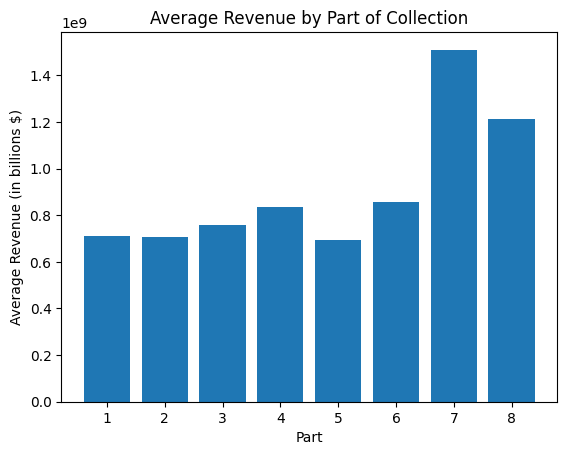

In [62]:
# Show average revenue for parts of collections

average_revenue = top_collections_data.groupby('part').agg({'revenue':'mean'}).reset_index()
average_revenue

#Create a bar graph

plt.bar(average_revenue['part'], average_revenue['revenue'])
plt.xlabel('Part')
plt.ylabel('Average Revenue (in billions $)')
plt.title('Average Revenue by Part of Collection')
plt.show()

Interestingly, as we can see on the graph above, among the top 50 most profitable movie collections the most successful movie part on average is Part 7. Important to note that Part 8 also does pretty well on average. Let's explore this a bit further and see what movies exactly contribute to such a distribution and discuss possible factors as to why the pattern takes place.

In [63]:
top_collections_data[top_collections_data['part']==7]

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords,release_year,part
16197,Harry Potter Collection,250000000.0,"Adventure, Fantasy, Family",12444,9.543059e+08,en,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,Warner Bros. Heyday Films,"GB, United Kingdom, US, United States of Am...",5708.0,7.5,2010-10-17,146.0,en English,"corruption, isolation, radio, magic, ...",2010,7
26629,Star Wars Collection,245000000.0,"Action, Adventure, Science Fiction, Fa...",140607,2.068224e+09,en,Star Wars: The Force Awakens,Star Wars: The Force Awakens,Lucasfilm Truenorth Productions Bad Robot,"US, United States of America",7993.0,7.5,2015-12-15,136.0,en English,"andro, spaceship, jedi, imax, space ...",2015,7
28903,The Fast and the Furious Collection,190000000.0,Action,168259,1.506249e+09,en,Furious 7,Furious 7,Universal Pictures Original Film Fuji Tel...,"JP, Japan, US, United States of America",4253.0,7.3,2015-04-01,137.0,en English,"car race, speed, revenge, suspense, ...",2015,7


We can see that there only three movies that are Parts 7 of their corresponding collections: "Harry Potter and the Deathly Hallows: Part 1" of the Harry Potter Collection; "Star Wars: The Force Awakens" of the Star Wars Collection; and "Furious 7" of the Fast and Furious Collection. Let's see how profitable they had to be inside their collections to skew the distribution towards the later parts.

In [64]:
hp = top_collections_data[top_collections_data['belongs_to_collection']=='Harry Potter Collection']
hp[['original_title','revenue','part']].sort_values(by='revenue',ascending=False)

,original_title,revenue,part
17511,Harry Potter and the Deathly Hallows: Part 2,1.342000e+09,8
4783,Harry Potter and the Philosopher's Stone,9.764756e+08,1
16197,Harry Potter and the Deathly Hallows: Part 1,9.543059e+08,7
11972,Harry Potter and the Order of the Phoenix,9.382127e+08,5
13952,Harry Potter and the Half-Blood Prince,9.339592e+08,6
10593,Harry Potter and the Goblet of Fire,8.959210e+08,4
5701,Harry Potter and the Chamber of Secrets,8.766885e+08,2
7757,Harry Potter and the Prisoner of Azkaban,7.898046e+08,3


Even though Harry Potter Collection's most profitable part was Part 8 ("Harry Potter and the Deathly Hallows: Part 2") and Part 7 was only the third most profitable one out of the franchise, the numbers are still so high that compared with Top 50 Collections it still manages to skew the Part Success distribution.

In [65]:
sw = top_collections_data[top_collections_data['belongs_to_collection']=='Star Wars Collection']
sw[['original_title','revenue','part']].sort_values(by='revenue',ascending=False)

,original_title,revenue,part
26629,Star Wars: The Force Awakens,2.068224e+09,7
42512,Rogue One: A Star Wars Story,1.056057e+09,8
2522,Star Wars: Episode I - The Phantom Menace,9.243176e+08,4
10105,Star Wars: Episode III - Revenge of the Sith,8.500000e+08,6
256,Star Wars,7.753980e+08,1
5264,Star Wars: Episode II - Attack of the Clones,6.493983e+08,5
1176,Return of the Jedi,5.727000e+08,3
1163,The Empire Strikes Back,5.384000e+08,2


In [66]:
ff = top_collections_data[top_collections_data['belongs_to_collection']=='The Fast and the Furious Collection']
ff[['original_title','revenue','part']].sort_values(by='revenue',ascending=False)

,original_title,revenue,part
28903,Furious 7,1.506249e+09,7
44278,The Fate of the Furious,1.238765e+09,8
21048,Fast & Furious 6,7.886798e+08,6
17123,Fast Five,6.261377e+08,5
13637,Fast & Furious,3.631643e+08,4
6267,2 Fast 2 Furious,2.363507e+08,2
4255,The Fast and the Furious,2.072839e+08,1
11093,The Fast and the Furious: Tokyo Drift,1.584683e+08,3


For both Star Wars Collection and the Fast and the Furious Collection Part 7 of the franchises were the most profitable out of the 8 parts in the collection. Even with three movies out of 156 which have eight parts, they skew the distribution towards the later parts because of how profitable those three franchises are.

Colcluding our analysis on movie collection parts and their success, we can say that later parts have higher revenue on average compared to earlier ones. There are several factors that might be a reason for such a distribution. Firstly, audience loyalty: viewers are engaged and dedicated to their favorite franchises, therefore enthusiastic when a new part comes out. Secondly, effective marketing: building on the profitability of the earlier parts, later ones tend to have higher spending on strategies for building anticipation and buzz. Finally, nostalgia usually plays a big part in the success of later parts of franchises, especially if the viewers were too young to see the first parts in the theaters.

----

Our analysis shows the significance of budgets, production companies, production countries, languages, and collection continuation in shaping the revenue patterns and trends of the cinematic world.



---



# **Q3: What Patterns Can We See by Exploring Genre Trends and Keywords Patterns in the Dataset?**

Cinema is a vast and evolving world where genres and keywords play a crucial role in defining the stories that captivate audiences. In this section, we will explore viewers' preferences on topics discussed on the silver screen. We will also consider the interconnection beteen keywords used to commonly describe movies and genres associated with those. What kind of themes can be found in the most successful movies? What kind of genres are more suitable for people prefering to watch movies about "violence" or "monsters"? Let's dive into the world of genres and keywords.

## *Q3.1 What Has Been the Average Revenue for All Genres Over Time?*

What genres have been consistently successful in the box office and which ones have a harder time appealing to a wider audience? We want to see what the average revenue distribution is throughout movie genres over time.

Since the 'genre_list' column in the original dataset could contain more than one genre in one cell, we split each genre out of the original column so that we could count them separately.

In [67]:
# Split "genres" values into separated values in a list and put in a new column called 'genres_list'
data_mov_key['genres_list'] = data_mov_key['genres'].str.split(', ')

# Split each value in the genres_list into its own row
data_mov_key = data_mov_key.explode('genres_list')
data_mov_key

<ipython-input-67-4d1d022c33a7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords,release_year,genres_list
0,Toy Story Collection,30000000.0,"Animation, Comedy, Family",862,373554033.0,en,Toy Story,Toy Story,Pixar Animation Studios,"US, United States of America",5415.0,7.7,1995-10-30,81.0,en English,"jealousy, toy, boy, friendship, frie...",1995,Animation
0,Toy Story Collection,30000000.0,"Animation, Comedy, Family",862,373554033.0,en,Toy Story,Toy Story,Pixar Animation Studios,"US, United States of America",5415.0,7.7,1995-10-30,81.0,en English,"jealousy, toy, boy, friendship, frie...",1995,Comedy
0,Toy Story Collection,30000000.0,"Animation, Comedy, Family",862,373554033.0,en,Toy Story,Toy Story,Pixar Animation Studios,"US, United States of America",5415.0,7.7,1995-10-30,81.0,en English,"jealousy, toy, boy, friendship, frie...",1995,Family
1,nan,65000000.0,"Adventure, Fantasy, Family",8844,262797249.0,en,Jumanji,Jumanji,TriStar Pictures Teitler Film Interscope ...,"US, United States of America",2413.0,6.9,1995-12-15,104.0,en English fr Français,"board game, disappearance, ""based on chi...",1995,Adventure
1,nan,65000000.0,"Adventure, Fantasy, Family",8844,262797249.0,en,Jumanji,Jumanji,TriStar Pictures Teitler Film Interscope ...,"US, United States of America",2413.0,6.9,1995-12-15,104.0,en English fr Français,"board game, disappearance, ""based on chi...",1995,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46432,nan,2000000.0,"Romance, Drama",63281,1268793.0,en,Pro Lyuboff,Про любоff,Profit,"RU, Russia",3.0,4.0,2010-09-30,107.0,ru Pусский,,2010,Drama
46442,nan,5000000.0,"Action, Comedy, Crime, Foreign",63898,1413000.0,ru,Antidur,Антидурь,,"RU, Russia",1.0,1.0,2007-09-06,91.0,ru Pусский,,2007,Action
46442,nan,5000000.0,"Action, Comedy, Crime, Foreign",63898,1413000.0,ru,Antidur,Антидурь,,"RU, Russia",1.0,1.0,2007-09-06,91.0,ru Pусский,,2007,Comedy
46442,nan,5000000.0,"Action, Comedy, Crime, Foreign",63898,1413000.0,ru,Antidur,Антидурь,,"RU, Russia",1.0,1.0,2007-09-06,91.0,ru Pусский,,2007,Crime


Since we have so many genres in the dataset, we are curious if they generate different revenues due to the differences in people's tastes. Wondering what genre makes the highest revenue among all, we are going to investigate the average revenue of each genre and sort them in the descending order in a bar plot for a clearer vision.

First, we clean and prepare the data for working.

In [68]:
# Prepare the data to continue working on genres and revenue
gen_avg_rev = data_mov_key[['genres_list', 'revenue']].copy()
gen_avg_rev = gen_avg_rev.reset_index()
gen_avg_rev

,index,genres_list,revenue
0,0,Animation,373554033.0
1,0,Comedy,373554033.0
2,0,Family,373554033.0
3,1,Adventure,262797249.0
4,1,Fantasy,262797249.0
...,...,...,...
13728,46432,Drama,1268793.0
13729,46442,Action,1413000.0
13730,46442,Comedy,1413000.0
13731,46442,Crime,1413000.0


In [69]:
# Drop the null values
gen_avg_rev.dropna(inplace = True)

In [70]:
# Drop the rows that only have space
gen_avg_rev = gen_avg_rev[gen_avg_rev['genres_list'] != '']

Then, we make sure that we have dropped all the movies having revenues below $10,000, and calculate the average revenue for each genre using the groupby method.

In [71]:
# Drop the movies that have revenues < 10,000
# Find the mean revenue for each genre
gen_avg_rev = gen_avg_rev[gen_avg_rev['revenue'] >= 10000]
gen_avg_rev = gen_avg_rev.groupby('genres_list')['revenue'].mean()

In [72]:
df_gen_avg_rev =gen_avg_rev.reset_index()

We draw the barplot to visualize the result, as it was one of the best strategies for comparing.

In [73]:
# Draw the bar plot for the mean revenue of each genre
# Sort the order of the bars on the chart in descending order
# Use the help of Gen AI since bokeh graph does not show up at first, and figure out that "output_notebook" needs to be called in colab to show bokeh graphs
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import NumeralTickFormatter

output_notebook()

d_gen_avg_rev = df_gen_avg_rev.sort_values("revenue", ascending=False)

fig_gen_rev = figure(x_range=d_gen_avg_rev["genres_list"], x_axis_label="Genres", y_axis_label="Average Revenue", title = "Average Revenue by Genres")
fig_gen_rev.vbar(x=d_gen_avg_rev["genres_list"], top=d_gen_avg_rev["revenue"], width=0.9)

fig_gen_rev.yaxis[0].formatter = NumeralTickFormatter(format="$0.0a")

fig_gen_rev.xaxis.major_label_orientation = 70

show(fig_gen_rev)

We were curious if the average revenue between genres would be different, and from the graph, we could see that Adventure and Animation movies generate the highest mean revenue while Documentary and Foreign movies generating the least. Movies in foreign languages tend to do worse at the box office since most people view going to the cinema as entertainment in the first place and not everyone agrees that reading subtitles is consistent with the entertainment. Documentaries also tend to be more serious and often painful, uncovering hardening truth about the humanity. On the other hand, Adventure, Animation, and Fantasy are the epitome of escapism. Who does not like letting themselves go while watching a new Pixar cartoon with a happy ending?

## *Q3.2 How Does Runtime of Movies Vary Depending on their Designated Genre?*

We wanted to study the variance in runtime of the top 5 genres (most frequent in the dataset) to check patterns in the duration and draw conclusions from the results.

Starting with some additional cleaning, we need to strip the genres column of ant unnecessary spaces.

In [74]:
# Get rid of all the spaces in the strings in the column 'keywords_list', so it is easier to further navigate
data_mov_key['genres_list'] = data_mov_key['genres_list'].str.strip()

Now, let's visualize our results in a boxplot format to have a better understanding of the runtime distribution across genres.

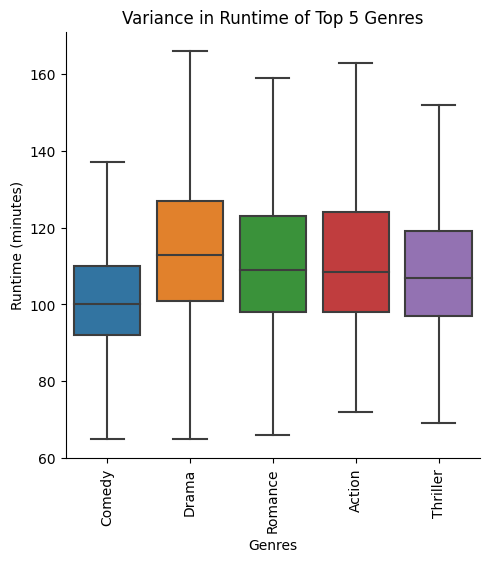

In [75]:
# Filter the data to show only 5 genres
need_genres = ["Drama", "Comedy", "Thriller", "Action", "Romance"]
is_data_mov_key = data_mov_key[data_mov_key["genres_list"].isin(need_genres)]
# Plot the visualization
sns.catplot(x="genres_list", y="runtime", kind="box", data=is_data_mov_key, showfliers= False)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Runtime (minutes)')
plt.title('Variance in Runtime of Top 5 Genres')
plt.show()

From the Boxplot above, we can conclude that
Drama movies have the highest variance (data spread). The lowest 25% starts from around 60 minutes and goes beyond 160 minutes. Comedy movies are usually shorter, even the longest one was below 140 minutes. This makes sense for an average viewer, since comedies are meant to be light! That does not go hand in hand with a long runtime.

The Interquartile Range of all movie genres except Comedy is quite similar and the 50th percentile (median) is 115 minutes (1 hour and 55 minutes).

## *Q3.3 Introducing Keywords with a WordCloud: Which Descriptions Pop Up the Most?*

After merging our movie metadata with keywords dataset in the beginning of this project, we were able to see what keywords are associated with specific movies. While some keywords are obvious, others might be more narrow and not so clear. Let's dive deeper into exploring the new variable "keywords" and find patterns between the movie genres and their descriptive keywords.  

First, we split the strings in the keywords column into lists, save them in the 'keyword_list' column, and then calculate the number of occurrences of each keyword and sort them in descending order.

In [76]:
data_mov_key['keywords_list'] = data_mov_key['keywords'].str.split(', ')
data_mov_key = data_mov_key.explode('keywords_list')
data_mov_key = data_mov_key[data_mov_key['keywords_list'] != '']
data_mov_key.groupby('keywords_list').agg({'keywords_list':'count'}).rename(columns={'keywords_list': 'count'}).sort_values('count',ascending=False)

,count
keywords_list,
duringcreditsstinger,815
based on novel,705
murder,697
woman director,609
violence,558
...,...
checks and balances,1
cheering crowd,1
tierversuch,1


By assigning values to the collated descents, we visualize the frequency of keyword occurrences using the Word Cloud.

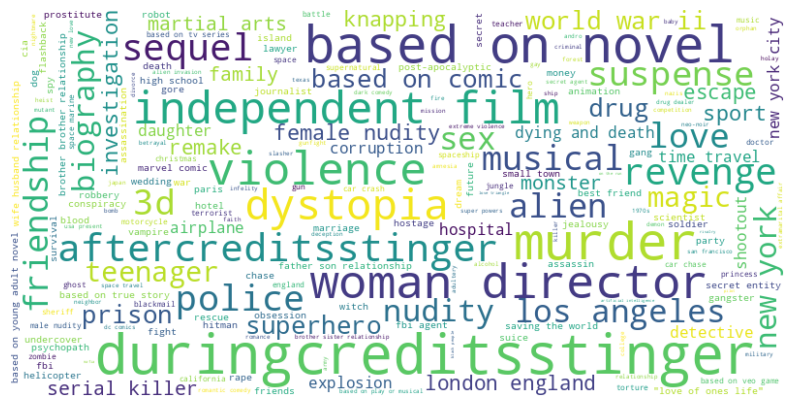

In [77]:
key_counts = data_mov_key.groupby('keywords_list').agg({'keywords_list':'count'}).rename(columns={'keywords_list': 'count'}).sort_values('count',ascending=False)
key_dict = key_counts['count'].to_dict()
WC = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(key_dict)
plt.figure(figsize=(10, 7))
plt.imshow(WC, interpolation='bilinear')
plt.axis('off')
plt.show()

This word cloud graph shows most keywords in our dataset. The font size in the word cloud represents the frequency of that keyword. We can definitely notice "murder", "independent film", and "woman director" popping out first. We will discuss those more in-detail in the following analyses.

# *Q3.4 What Keywords are Associated with the Three Most Common Genres?*


Let's start the exploration of keywords and genres connection by looking at three most common genres of the dataset and ascribing keywords associated with them.

In order to decide which genres were analyzed, the 'genres_list' column was  put into order from most common to least common. This demonstrated that Drama, Comedy, and Thriller were the most common genres in the dataset.

In [78]:
# Show how many times each genre appears in the dataset in descending order
# Rename column 'genres_list' into 'count' for better understanding

data_mov_key.groupby('genres_list').agg({'genres_list':'count'}).rename(columns={'genres_list': 'count'}).sort_values('count',ascending=False)

,count
genres_list,
Drama,20303
Thriller,13855
Comedy,12748
Action,11926
Adventure,8652
Crime,7326
Romance,7174
Science Fiction,6131
Horror,5429


In [79]:
# Get rid of all the spaces in the strings in the column 'keywords_list', so it is easier to further navigate

data_mov_key['keywords_list'] = data_mov_key['keywords_list'].str.strip()

We create a new dataset "drama" only consisting of movies in the drama genre and see which keywords are the most common in the genre.

Out of the top 10 most frequent keywords, we decide to take out "woman director" and "independent film". We do that because both of those keywords are not representative of a genre but rather a filmmaking uniqueness. Another reason for dismissing those is the fact that opposite movies (male director/production company movie) do not mention that in the keywords making it seem like "woman director" and "independent film" are incredibly common, which is not completely true.

In [80]:
# Create a new value drama and only use rows that have "Drama" as a genre

drama = data_mov_key[data_mov_key['genres_list']=='Drama']

# Show how many times each keyword shows up for the Drama genre (top 10)
# Rename column 'keywords_list' into 'count' for better understanding and reset index to make graphing easier

drama_keywords = drama.groupby('keywords_list').agg({'keywords_list':'count'}).rename(columns={'keywords_list': 'count'}).sort_values('count',ascending=False).head(10).reset_index()

# Drop "woman director" and "independent film" because it is not representory of genre
drama_keywords = drama_keywords.iloc[2:]
drama_keywords

,keywords_list,count
2,woman director,164
3,biography,124
4,murder,115
5,love,90
6,violence,87
7,sport,83
8,sex,76
9,suspense,72


We create a new dataset "comedy" only consisting of movies in the comedy genre and see which keywords are the most common in the genre.

In [81]:
# Create a new value comedy and only use rows that have "Comedy" as a genre

comedy = data_mov_key[data_mov_key['genres_list']=='Comedy']

# Show how many times each keyword shows up for the Comedy genre (top 10)
# Rename column 'keywords_list' into 'count' for better understanding and reset index to make graphing easier

comedy_keywords = comedy.groupby('keywords_list').agg({'keywords_list':'count'}).rename(columns={'keywords_list': 'count'}).sort_values('count',ascending=False).head(10).reset_index()

# Drop "woman director" and "independent film" because it is not representory of genre
comedy_keywords= comedy_keywords.iloc[2:]
comedy_keywords

,keywords_list,count
2,independent film,106
3,aftercreditsstinger,81
4,friendship,60
5,wedding,54
6,based on novel,53
7,sex,53
8,sport,50
9,love,49


We create a new dataset "thriller" only consisting of movies in the thriller genre and see which keywords are the most common in the genre.

In [82]:
# Create a new value thriller and only use rows that have "Thriller" as a genre

thriller = data_mov_key[data_mov_key['genres_list']=='Thriller']

# Show how many times each keyword shows up for the Thriller genre (top 10)
# Rename column 'keywords_list' into 'count' for better understanding and reset index to make graphing easier

thriller_keywords = thriller.groupby('keywords_list').agg({'keywords_list':'count'}).rename(columns={'keywords_list': 'count'}).sort_values('count',ascending=False).head(10).reset_index()

# Drop "woman director" and "independent film" because it is not representory of genre
indexes_to_remove = [2, 5]
thriller_keywords = thriller_keywords.drop(indexes_to_remove)
thriller_keywords

,keywords_list,count
0,murder,159
1,violence,115
3,dystopia,76
4,revenge,73
6,police,68
7,sequel,59
8,serial killer,56
9,independent film,50


Finally, let's plot three subplots for each of the top 3 common genres and the keywords that are associated with them the most commonly.

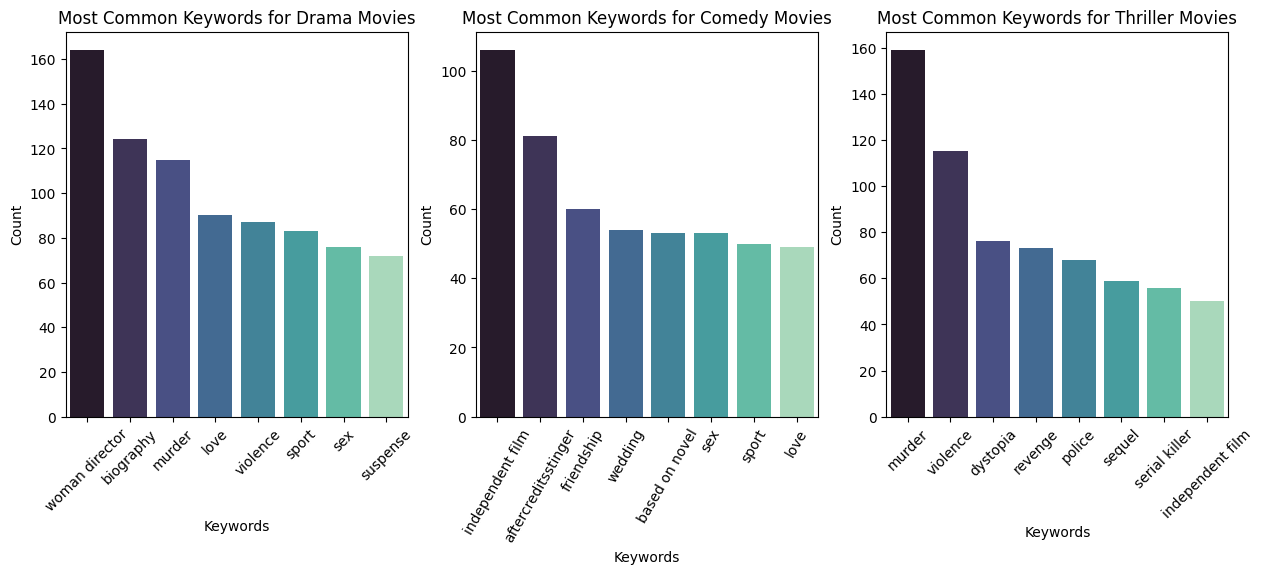

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Top keywords for Drama genre
sns.barplot(x='keywords_list', y='count', data=drama_keywords, palette='mako', ax=axes[0])
axes[0].set_title('Most Common Keywords for Drama Movies')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_xlabel('Keywords')
axes[0].set_ylabel('Count')

# Top keywords for Comedy genre
sns.barplot(x='keywords_list', y='count', data=comedy_keywords, palette='mako', ax=axes[1])
axes[1].set_title('Most Common Keywords for Comedy Movies')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=60)
axes[1].set_xlabel('Keywords')
axes[1].set_ylabel('Count')

# Top keywords for Thriller genre
sns.barplot(x='keywords_list', y='count', data=thriller_keywords, palette='mako', ax=axes[2])
axes[2].set_title('Most Common Keywords for Thriller Movies')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
axes[2].set_xlabel('Keywords')
axes[2].set_ylabel('Count')

plt.show()

After taking out the “woman director” and “independent film” out of the top keywords, our data shows us that most common keywords for the Drama genre are Murder, Based on Novel, Biography, Sex, Love, Suspense, Nudity, and Violence. All of them match up with intuitive associations of the Drama genre, however it is definitely surprising seeing “Murder” as the top 1 keyword for this genre with 500+ mentions in the dataset. Also, it is interesting to note that most drama movies are based on novels.

Most common keywords for the Comedy genre turned out to be Musical, Stand-Up Comedy, During Credits Stinger, Sex, Love, Sport, Teenager, and Friendship. Once again, most of them are intuitive as associations for Comedy movies. During Credits Stinger is a mid-credit short teaser clip usually containing a joke related to the movie (examples used in Pirates of the Caribbean, Marvel movies, and Pixar cartoons).

Most common keywords for the Thriller genre are Murder, Suspense, Violence, Revenge, Police, Nudity, Serial Killer, and Based on Novel. We definitely see some similarity between Drama and Thriller genres.

---



## *Q3.5 What is the Genre Distribution for Each of the Top 5 Most Frequent Keywords in the Dataset?*

After looking at the most frequent keywords for top 3 genres, we decided to go in the opposite direction and see what the top 5 most frequent keywords across all genres are and what genres can they mostlty be found in.

Let's start by looking at the top 10 most frequent keywords in the dataset. For the reasons explained in previous sections, let's get rid of "woman director" and "sequel" as they are not representative for analysis (only appearing when it's not the opposite: not male director and not original movie correspondingly).

In [84]:
#Find most frequent keywords across all genres
#top_keywords = data_mov_key.keywords_list.value_counts().sort_values(ascending=False).head(12)

top_keywords = data_mov_key.groupby('keywords_list').agg({'keywords_list':'count'}).rename(columns={'keywords_list': 'count'}).sort_values('count',ascending=False).head(12).reset_index()
top_keywords

# Drop unrepresentative keywords (discussed before + sequel)
indexes_to_remove = [0, 4]
top_keywords = top_keywords.drop(indexes_to_remove)
top_keywords




,keywords_list,count
1,based on novel,705
2,murder,697
3,woman director,609
5,independent film,539
6,dystopia,491
7,aftercreditsstinger,447
8,sequel,392
9,revenge,382
10,police,368
11,suspense,350


In the next step, we are subsetting the dataset to only show movie rows which have the top 10 keywords we found above. Now we have 2949 rows.

In [85]:
# Subset only rows with top 10 keywords
top_keywords = top_keywords['keywords_list'].tolist()
top_keywords_data = data_mov_key[data_mov_key['keywords_list'].isin(top_keywords)]


In [86]:
top_keywords_data

,belongs_to_collection,budget,genres,id,revenue,original_language,title,original_title,production_companies,production_countries,vote_count,vote_average,release_date,runtime,spoken_languages,keywords,release_year,genres_list,keywords_list
3,nan,16000000.0,"Comedy, Drama, Romance",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,Twentieth Century Fox Film Corporation,"US, United States of America",34.0,6.1,1995-12-22,127.0,en English,"based on novel, interracial relationship, ...",1995,Comedy,based on novel
3,nan,16000000.0,"Comedy, Drama, Romance",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,Twentieth Century Fox Film Corporation,"US, United States of America",34.0,6.1,1995-12-22,127.0,en English,"based on novel, interracial relationship, ...",1995,Drama,based on novel
3,nan,16000000.0,"Comedy, Drama, Romance",31357,81452156.0,en,Waiting to Exhale,Waiting to Exhale,Twentieth Century Fox Film Corporation,"US, United States of America",34.0,6.1,1995-12-22,127.0,en English,"based on novel, interracial relationship, ...",1995,Romance,based on novel
5,nan,60000000.0,"Action, Crime, Drama, Thriller",949,187436818.0,en,Heat,Heat,Regency Enterprises Forward Pass Warner B...,"US, United States of America",1886.0,7.7,1995-12-15,170.0,en English es Español,"robbery, detective, bank, obsession, ...",1995,Action,murder
5,nan,60000000.0,"Action, Crime, Drama, Thriller",949,187436818.0,en,Heat,Heat,Regency Enterprises Forward Pass Warner B...,"US, United States of America",1886.0,7.7,1995-12-15,170.0,en English es Español,"robbery, detective, bank, obsession, ...",1995,Action,suspense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46035,nan,60000000.0,"Action, Western, Science Fiction, Fant...",353491,71000000.0,en,The Dark Tower,The Dark Tower,Imagine Entertainment Weed Road Pictures ...,"ZA, South Africa, US, United States of America",688.0,5.7,2017-08-03,95.0,en English,"gunslinger, based on novel",2017,Horror,based on novel
46188,nan,11000000.0,"Action, Crime, Mystery, Thriller",395834,184770205.0,en,Wind River,Wind River,Thunder Road Pictures Star Thrower Entertai...,"GB, United Kingdom, US, United States of Am...",181.0,7.4,2017-08-03,111.0,en English,"rape, mountain, gun, investigation, ...",2017,Action,murder
46188,nan,11000000.0,"Action, Crime, Mystery, Thriller",395834,184770205.0,en,Wind River,Wind River,Thunder Road Pictures Star Thrower Entertai...,"GB, United Kingdom, US, United States of Am...",181.0,7.4,2017-08-03,111.0,en English,"rape, mountain, gun, investigation, ...",2017,Crime,murder
46188,nan,11000000.0,"Action, Crime, Mystery, Thriller",395834,184770205.0,en,Wind River,Wind River,Thunder Road Pictures Star Thrower Entertai...,"GB, United Kingdom, US, United States of Am...",181.0,7.4,2017-08-03,111.0,en English,"rape, mountain, gun, investigation, ...",2017,Mystery,murder


To look at a smaller sample, we made five new variables for each of the top 5 keywords that show how many times the jeyword shows up in each genre.

In [87]:
# Make new variables for each of the top 10 keywords
keyword1 = top_keywords_data[top_keywords_data['keywords_list']==top_keywords[0]]
keyword1 = keyword1.groupby('genres_list').agg({'genres_list':'count'}).rename(columns={'genres_list': 'duringcreditsstinger'}).sort_values('duringcreditsstinger',ascending=False).reset_index()

keyword2 = top_keywords_data[top_keywords_data['keywords_list']==top_keywords[1]]
keyword2 = keyword2.groupby('genres_list').agg({'genres_list':'count'}).rename(columns={'genres_list': 'murder'}).sort_values('murder',ascending=False).reset_index()

keyword3 = top_keywords_data[top_keywords_data['keywords_list']==top_keywords[2]]
keyword3 = keyword3.groupby('genres_list').agg({'genres_list':'count'}).rename(columns={'genres_list': 'violence'}).sort_values('violence',ascending=False).reset_index()

keyword4 = top_keywords_data[top_keywords_data['keywords_list']==top_keywords[3]]
keyword4 = keyword4.groupby('genres_list').agg({'genres_list':'count'}).rename(columns={'genres_list': 'based on novel'}).sort_values('based on novel',ascending=False).reset_index()

keyword5 = top_keywords_data[top_keywords_data['keywords_list']==top_keywords[4]]
keyword5 = keyword5.groupby('genres_list').agg({'genres_list':'count'}).rename(columns={'genres_list': 'monster'}).sort_values('monster',ascending=False).reset_index()


In [88]:
keyword1

,genres_list,duringcreditsstinger
0,Drama,164
1,Thriller,72
2,Romance,65
3,Comedy,53
4,Adventure,51
5,Fantasy,44
6,Action,43
7,Crime,38
8,Family,38
9,Mystery,32


In [89]:
keywords_1_to_5 = [keyword1,keyword2,keyword3,keyword4,keyword5]

Finally, we visualize our findings using bar subplots for the top 5 keywords and how many times we can find them in each genre in the dataset.

<ipython-input-90-7b4dc8bd65b6>:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



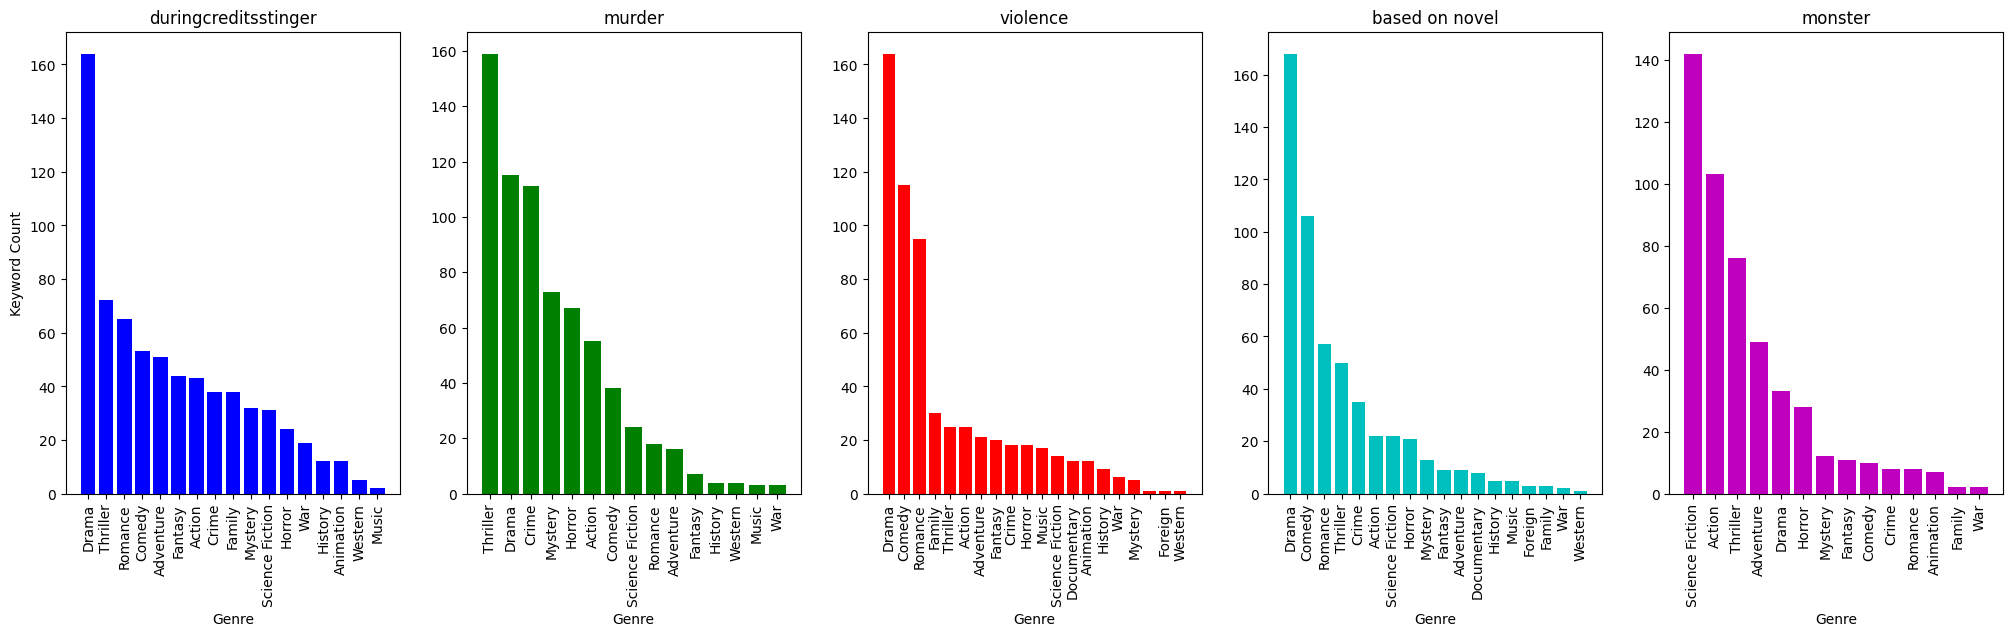

In [90]:
# Specify colors for the subplots
subplot_colors = ['b', 'g', 'r', 'c', 'm']

# Create a 1x5 grid of subplots with larger figure size
fig, axs = plt.subplots(1, 5, figsize=(25, 6))

# Loop through the DataFrames and plot them on subplots with specified colors
# Chat GPT was used for this
for i, (df, color) in enumerate(zip(keywords_1_to_5, subplot_colors)):
    # Create a bar plot for the current DataFrame on the current subplot with the specified color
    axs[i].bar(df['genres_list'], df[df.columns[1]], color=color)
    axs[i].set_title(df.columns[1])
    axs[i].set_xlabel('Genre')

    if i == 0:
        axs[i].set_ylabel('Keyword Count')  # Set y-axis label for the first subplot
    else:
        axs[i].set_ylabel('')  # Remove y-axis labels for other subplots

    # Rotate x-axis tick labels by 45 degrees for better readability
    axs[i].set_xticklabels(df['genres_list'], rotation=90)

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.2)


These subplots above have several interesting findings about the top 5 most frequent keywords. Let's start with "during credits stinger": as explained before, this keyword implies that there is a mid-end-credits scene. It is most commonly found in such genres as Comedy, Action, and Adventure but it's almost never found in History, Documentary, or Western movies, which makes perfect sense considering the "seriousness" of those genres.

The keyword "murder" turned out to be the second most frequent word in the dataset. It is, understandably, most found in Thriller, Horror, Action, and Crime, while very rarely found in Family-friendly movies.
We can see a similar trend with the third most frequent keyword - "violence". Those two keywords definitely seem interrelated.

Most based on novel movies can be found in Drama, Fantasy, or Thriller genre. I bet all of us can think of some fantasy movies based on books off of our heads: Lord of the Rings, Harry Potter, Alice in Wonderland, and so many more.

Finally, the fifth most frequent keyword, "monster", is most commonly found in Sci-Fi, Horror, and Fantasy (Spielberg's E.T. definitely comes to mind!). However, it's rarely seen in such genres as War and Crime (which makes sense, considering that they are very realistic genres).




## *Q3.6 What are the Top 25 Keywords based on Revenue?*

To conclude our keywords analysis, let us consider which keywords are associated with more successful movies based on revenue. What kind of topics and themes bring people to the theaters?

We calculate and sort the average revenue of the keywords using the groupby function and show the top twenty-five keywords with the highest revenue.

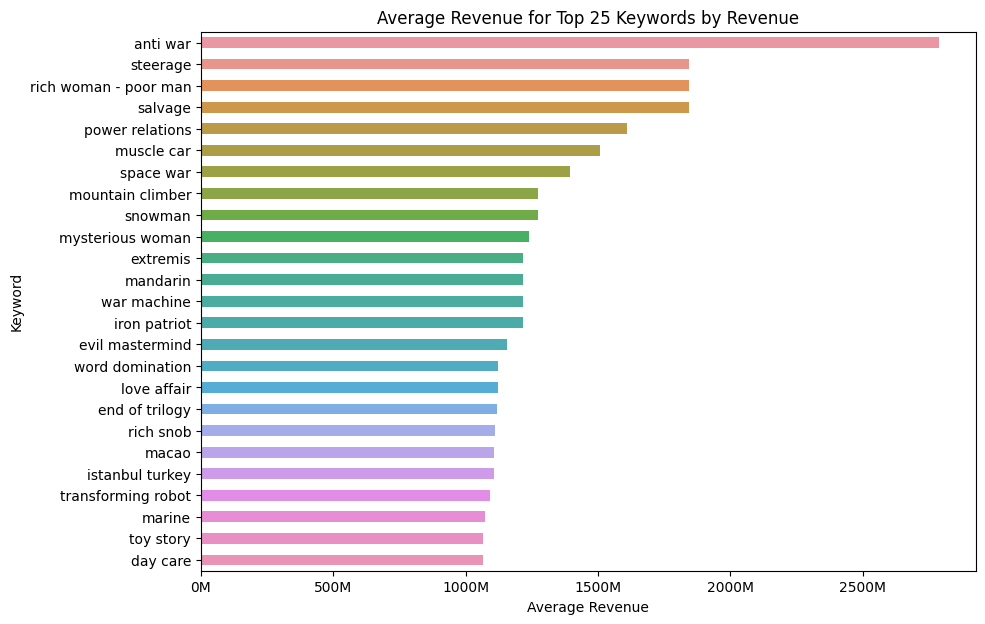

In [91]:
ave_revenue = data_mov_key.groupby('keywords_list')['revenue'].mean()
top = ave_revenue.sort_values(ascending=False).head(25)
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=top, y=top.index, width=0.5)
plt.xlabel('Average Revenue')
plt.ylabel('Keyword')
plt.title('Average Revenue for Top 25 Keywords by Revenue')
def abbre1(x, pos):
    return f"{x/1e6:.0f}M"
ax.xaxis.set_major_formatter(plt.FuncFormatter(abbre1))
plt.show()

This horizontal barplot shows the top 25 keywords with the highest average revenue. It's clear as we can see shades of the movies they belong to in their corresponding keywords: anti war - Avatar, Snow man - Frozen, Space War - Star Wars.

---

In conclusion, this analysis has provided a deeper understanding of the dynamics in the film industry, including genre-related revenue distribution, duration trends, and the impact of keywords on genre categorization.

----

# Challenges

During our analysis, we have definitely bumped into several challenges which made us go deeper into the exploration of our data.

Version control was mainly the largest one: working on the document as a team and making sure that we are using all the same variable names and consistent format.

The data was not clean in the sense of several columns having multiple values in the same cell. We had to "explode" the data into new columns and rows to make sure it was workable with.

# **Final Conclusions**

During our explorationg of the dynamic world of the cinematic industry, we have discovered emerging patterns and trends that provide valuable insight into how the industry works and what factors affect it. We aim to provide stakeholders with a deep understanding of the financial, thematic, and structural forces within this industry. The analysis has been conducted over a period of approximately 3.5 weeks by Team 7.  After cleaning and preparing the Movies Metadata we were able to visualize and analyze our problem definitions.

**Structural Trends: Duration**

Over the past century, there has been a significant fluctuation in average movie runtimes. The 1920s to 1970s saw a rise in average runtime, likely influenced by technological advancements. However, since the 1970s, there has been a preference for shorter movies, with an average duration of approximately 1.5 hours.

**Financial Trends: Revenue**

Budget and revenue demonstrate a positive correlation, highlighting that higher budgets are often associated with higher revenue.
A positive correlation is also observed between revenue and vote count, suggesting that successful movies tend to receive more attention and reviews.

Movies with more languages tend to generate higher revenue, indicating their appeal to diverse audiences.

Later parts of movie collections tend to have higher revenue on average, driven by factors like audience loyalty, effective marketing, and nostalgia.

**Thematic Trends: Genres and Keywords**

Adventure and Animation genres consistently generate the highest mean revenue, while Documentary and Foreign movies tend to generate the least. This discrepancy is attributed to audience preferences, language barriers, and the nature of the content.

Keywords are often descriptory of genres, such as "muder" and violence" being associated with Drama and Thriller movies.

-----

#### *Overall, we believe our findings can be useful for better understanding of the film industry trends and viewers’ preferences. This analysis can be further used for potential recommendation engines (input keyword - get movies of specific genres), can help filmmakers and studios make informed decisions about the optimal length of their movies (based on audience preferences and industry trends), and help marketing teams to craft targeted promotional campaigns.*

## *References*

*  ChatGPT, OpenAI, https://chat.openai.com/ (only for codes referred on the notebook as "Chat GPT was used for this/This was done with the help of ChatGPT")
*   https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data
*   https://en.wikipedia.org/wiki/Braveheart

*   https://www.the-numbers.com/box-office-records/worldwide/all-movies/theatrical-distributors/warner-bros/101
*   https://www.the-numbers.com/box-office-records/worldwide/all-movies/theatrical-distributors/20th-century-fox


*   https://movieweb.com/famous-amblin-movies-ranked/#poltergeist-1982


*   https://www.the-numbers.com/box-office-records/worldwide/all-movies/theatrical-distributors/universal
*   https://www.the-numbers.com/movies/distributor/Paramount-Pictures#tab=year


*  https://en.wikipedia.org/wiki/Blue_Sky_Studios
*   https://en.wikipedia.org/wiki/List_of_Disney_theatrical_animated_feature_films


*   https://en.wikipedia.org/wiki/List_of_DreamWorks_Animation_productions
*   https://en.wikipedia.org/wiki/List_of_Pixar_films


*   https://seaborn.pydata.org/tutorial/color_palettes.html















#### Workload Distribution
*By request of Professor Soltanieh-ha*

Problem Definition and Importance: Audrey

Description of Dataset: Audrey

Writing for 1st Phase of Project: Audrey

Data Cleaning: Mahika, Qingyuan, and Simiao (other team members wrote specific cleaning codes for their problems)

Overview of Variable Correlation in the Dataset: Mahika

Q1. How has runtime changed over the last century?: Audrey, Simiao

Q2.1 What Is the Relationship Between Movie Budget and Movie Revenue?: Qingyuan, Simiao

Q2.2 What Are the Top 5 Production Companies in the 21st Century Based on Revenue?: Ritam

Q2.3 What Are the Top 5 Production Companies in the 20th Century Based on Revenue?: Ritam

Q2.4 How Does Average Movie Revenue Vary by Production Country Over Time?: Simiao

Q2.5 Does the Amount of Spoken Languages in a Film Influence its Success?: Audrey

Q2.6 How Does the Number of Spoken Languages in a Movie Affect Its Popularity Among the Viewers?: Audrey

Q2.7 How Does Revenue Vary by Parts of the Same Film Collection?: Sonya

Q3.1 What Has Been the Average Revenue for All Genres Over Time?: Simiao

Q3.2 How Does Runtime of Movies Vary Depending on their Designated Genre?: Mahika

Q3.3 Introducing Keywords with a WordCloud: Which Descriptions Pop Up the Most?: Qingyuan

Q3.4 What Keywords are Associated with the Three Most Common Genres?: Sonya

Q3.5 What is the Genre Distribution for Each of the Top 5 Most Frequent Keywords in the Dataset?: Sonya

Q3.6 What are the Top 25 Keywords based on Revenue?: Qingyuan

Writing and Markdowns: Simiao and Sonya (other team members wrote specific markdowns for their problems)

Final Conclusion and References: Sonya, Mahika

